# Batch Learning Analysis

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load validation dataset

Loading offline validation results.

In [3]:
file_names = ["validationResults_id11010024.csv", "validationResults_id14061721.csv", 
              "validationResults_id12041992.csv", "validationResults_id12041022_2.csv"]

offline_df = pd.DataFrame()

for file_name in file_names:
    input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), file_name)
    df =  pd.read_csv(input_file_path, index_col=[0,1,2], header=[0,1])
    
    offline_df = pd.concat([offline_df, df], axis=1)

Loading batch validation results.

In [4]:
#file_names = ["eval_top20_id12041992_big.csv", "eval_top20_id11010024_big.csv", 
#              "eval_top20_id14061721_big.csv"]

file_names = ["eval_top20_id12041992_big.csv", "eval_top20_id11010024_big.csv", 
              "eval_top20_id14061721_big.csv", "eval_top20_id12041022_big.csv"]

batch_df = pd.DataFrame()

for file_name in file_names:
    input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), file_name)
    df =  pd.read_csv(input_file_path, index_col=[0,1,2], header=[0,1])
    
    batch_df = pd.concat([batch_df, df], axis=1)

Loading online validation resoults.

In [5]:
#TODO
#online_df = batch_df

input_file_name = "online_validationResults_MF10_10.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

online_df =  pd.read_csv(input_file_path, index_col=[0,1,2], header=[0,1])

# Validation Analyisis

average for all horizons

In [6]:
batch_df.groupby(level=['dataset', 'model'], sort=False).mean()

sensor                            id12041992             id11010024       \
results                                   R2   MAE  MAPE         R2  MAE   
dataset       model                                                        
Last value    Baselines                -0.76 36.89 47.16      -0.63 1.35   
Previous day  Baselines                 0.38 19.90 23.38       0.13 0.87   
Previous week Baselines                 0.55 17.38 20.37       0.43 0.70   
AR_WF_DT      Ridge Regression          0.73 14.23 17.69       0.62 0.72   
              K Nearest Neighbors       0.45 20.03 25.24       0.32 0.93   
              Random Forest             0.76 13.16 16.35       0.73 0.55   

sensor                                   id14061721            id12041022  \
results                             MAPE         R2  MAE  MAPE         R2   
dataset       model                                                         
Last value    Baselines           117.31      -0.33 3.36 67.01      -0.40   
Previous day  Baselines            90.47       0.40 2.02 41.37       0.31   
Previous week Baselines            58.06       0.66 1.56 30.63       0.68   
AR_WF_DT      Ridge Regression     71.71       0.78 1.50 35.86       0.83   
              K Nearest Neighbors  79.26       0.61 1.87 42.65       0.32   
              Random Forest        44.44       0.85 1.13 24.00       0.93   

sensor                                          
results                              MAE  MAPE  
dataset       model                             
Last value    Baselines           305.33 54.85  
Previous day  Baselines           166.67 34.66  
Previous week Baselines           106.54 20.73  
AR_WF_DT      Ridge Regression     96.48 19.33  
              K Nearest Neighbors 206.41 37.73  
              Random Forest        55.68 10.66

Average for all horizons and sensors

In [7]:
batch_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(level='results', axis=1, sort=False).mean()

results                             MAE  MAPE    R2
dataset       model                                
Last value    Baselines           86.74 71.58 -0.53
Previous day  Baselines           47.36 47.47  0.31
Previous week Baselines           31.55 32.45  0.58
AR_WF_DT      Ridge Regression    28.23 36.15  0.74
              K Nearest Neighbors 57.31 46.22  0.42
              Random Forest       17.63 23.86  0.82

## Offline vs. Batch vs. Online 

- Pobrisi 'True' in 'Predicted' columns

In [8]:
# prepare dataframes for different approach
batch_df = batch_df.drop(['true', 'predicted'], axis=1, level=1)
online_df = online_df.drop(['true', 'predicted'], axis=1, level=1)

Change offline dataframe column names from 'error metric' to 'results', so that it is consistent with others.

In [9]:
offline_df.columns = offline_df.columns.set_names(['sensor', 'results'])

- Dodaj offline rezultate za primerjavo

In [10]:
# merge all evaluation results for different approaches (offline, bathc and online)
df = pd.concat([offline_df, batch_df, online_df], axis=1, keys=['offline', 'batch', 'online'], names=['approach'])

In [11]:
df.head()

approach                               offline                              \
sensor                              id11010024                  id14061721   
results                                     R2  MAE   MAPE MASE         R2   
horizon dataset model                                                        
1       ALL     K Nearest Neighbors      -0.14 1.27 114.84 2.09      -0.21   
                Random Forest             0.77 0.52  40.10 0.85       0.89   
                Ridge Regression          0.73 0.60  55.73 0.98       0.87   
        AR      K Nearest Neighbors       0.68 0.59  53.69 0.97       0.84   
                Random Forest             0.74 0.55  46.36 0.91       0.88   

approach                                                              ...   \
sensor                                               id12041992       ...    
results                              MAE   MAPE MASE         R2   MAE ...    
horizon dataset model                                                 ...    
1       ALL     K Nearest Neighbors 3.69 105.41 2.26       0.20 24.62 ...    
                Random Forest       1.03  23.83 0.63       0.78 12.61 ...    
                Ridge Regression    1.14  26.66 0.70       0.79 12.56 ...    
        AR      K Nearest Neighbors 1.24  28.39 0.76       0.64 16.42 ...    
                Random Forest       1.10  26.50 0.67       0.77 12.92 ...    

approach                                online                                 \
sensor                              id12041992 id11010024          id14061721   
results                                   MAPE         R2 MAE MAPE         R2   
horizon dataset model                                                           
1       ALL     K Nearest Neighbors        nan        nan nan  nan        nan   
                Random Forest              nan        nan nan  nan        nan   
                Ridge Regression           nan        nan nan  nan        nan   
        AR      K Nearest Neighbors        nan        nan nan  nan        nan   
                Random Forest              nan        nan nan  nan        nan   

approach                                                          
sensor                                       id12041022           
results                             MAE MAPE         R2 MAE MAPE  
horizon dataset model                                             
1       ALL     K Nearest Neighbors nan  nan        nan nan  nan  
                Random Forest       nan  nan        nan nan  nan  
                Ridge Regression    nan  nan        nan nan  nan  
        AR      K Nearest Neighbors nan  nan        nan nan  nan  
                Random Forest       nan  nan        nan nan  nan  

[5 rows x 40 columns]

In [12]:
#df.xs(['AR_WF_DT'],level=["dataset"])
#df.loc(['AR_WF_DT'])
#df.xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1)
#df.xs(['AR_WF_DT'],level=["dataset"]).xs(["R2"], level=['results'], axis=1)
#df.xs(['AR_WF_DT'],level=["dataset"]).xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1)
#df.xs(['AR_WF_DT'],level=["dataset"]).xs(["id11010024", "R2"], level=['sensor', 'results'], axis=1)
#df.xs(['AR_WF_DT'],level=["dataset"]).xs(["id14061721", "R2"], level=['sensor', 'results'], axis=1)

### Averaged over all horizons

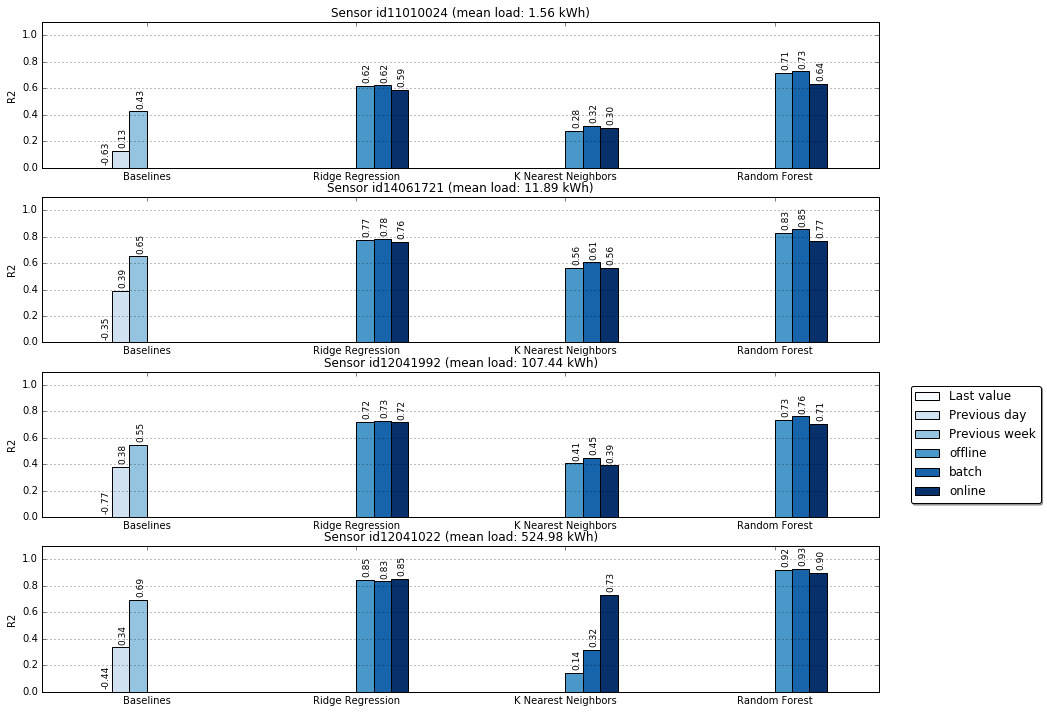

In [13]:
sensors_properties = [
    {'id': "id11010024", 'lim': [0,120], 'h_delta': 16, 'mean_load': "1.56 kWh"},
    {'id': "id14061721", 'lim': [0,100], 'h_delta': 13, 'mean_load': "11.89 kWh"},
    {'id': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12, 'mean_load': "107.44 kWh"},
    {'id': "id12041022", 'lim': [0,1], 'h_delta': 0.1, 'mean_load': "524.98 kWh"},
    ]

sensors = batch_df.columns.levels[0]

error_metric = "R2"
#properties = {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1, 'w_delta': 0.01}
properties = {'err_name': "R2", 'lim': [0,1.1], 'h_delta': 0.12, 'w_delta': 0.03}

f, axx = plt.subplots(len(sensors),1)
f.set_size_inches(15,len(sensors)*3)

# average over all horizons
df_avr = df.groupby(level=['dataset', 'model'], sort=False).mean()

# iterate over all sensors
for idx, sensor in enumerate(sensors_properties):
    sensor = sensor['id']
    
    # prepare dataframes for different approaches
    offline = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['offline'].unstack(0)
    batch = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['batch'].unstack(0)
    online = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['online'].unstack(0)

    # change names
    offline.rename(columns={'AR_WF_DT': 'offline'}, inplace=True)
    batch.rename(columns={'AR_WF_DT': 'batch'}, inplace=True)
    online.rename(columns={'AR_WF_DT': 'online'}, inplace=True)

    # concatenate df
    m = pd.concat([offline[['Last value', 'Previous day', 'Previous week']], offline[['offline']], batch[['batch']], online[['online']]], axis=1)
    
    # reindex
    m = m.reindex(index=['Baselines', 'Ridge Regression', 'K Nearest Neighbors', 'Random Forest'])

    # plot evaluation results with baselines
    #ax = m.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'], title=sensor)
    ax = m.plot(ax = axx[idx], kind='bar',  colormap='Blues', ylim=properties['lim'],  legend=False, rot=0)
    
    # add results to bar plot
    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.2
            
            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - properties['w_delta'], height), fontsize=9, ha='center', rotation=90)

    ax.yaxis.grid(True)
    ax.set_title("Sensor {} (mean load: {})".format(sensor,sensors_properties[idx]['mean_load']))
    #ax.set_title(sensor)
    ax.set_ylabel(error_metric)
    ax.set_xlabel("")
    
plt.legend(loc='right', bbox_to_anchor=(1.2, 1.7), ncol=1, fancybox=True, shadow=True)
plt.show()

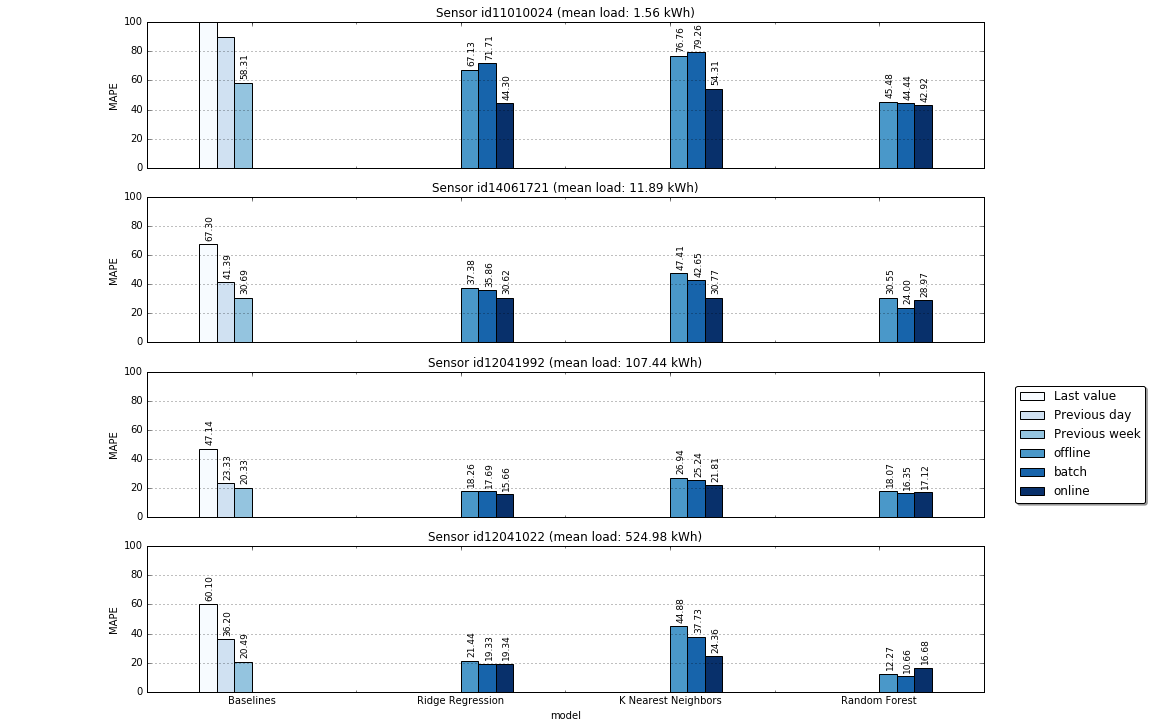

In [14]:
sensors_properties = [
    {'id': "id11010024", 'lim': [0,120], 'h_delta': 16, 'mean_load': "1.56 kWh"},
    {'id': "id14061721", 'lim': [0,100], 'h_delta': 13, 'mean_load': "11.89 kWh"},
    {'id': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12, 'mean_load': "107.44 kWh"},
    {'id': "id12041022", 'lim': [0,1], 'h_delta': 0.1, 'mean_load': "524.98 kWh"},
    ]

# sensors_properties = {
#     "id11010024": {'mean_load': "1.56 kWh"},
#     "id14061721": {'mean_load': "11.89 kWh"},
#     "id12041992": {'mean_load': "107.44 kWh"},
#     "id12041022": {'mean_load': "524.98 kWh"},
# }

sensors = batch_df.columns.levels[0]

error_metric = "MAPE"
#properties = {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1, 'w_delta': 0.01}
#properties = {'err_name': "R2", 'lim': [0,1.1], 'h_delta': 0.12, 'w_delta': 0.03}
properties = {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 15.42, 'w_delta': 0.03}

f, axx = plt.subplots(len(sensors),1, sharex=True)
f.set_size_inches(15,len(sensors)*3)

# average over all horizons
df_avr = df.groupby(level=['dataset', 'model'], sort=False).mean()

# iterate over all sensors
for idx, sensor in enumerate(sensors_properties):
    sensor = sensor['id']
    
    # prepare dataframes for different approaches
    offline = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['offline'].unstack(0)
    batch = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['batch'].unstack(0)
    online = df_avr.xs([sensor, error_metric], level=['sensor', 'results'], axis=1)['online'].unstack(0)

    # change names
    offline.rename(columns={'AR_WF_DT': 'offline'}, inplace=True)
    batch.rename(columns={'AR_WF_DT': 'batch'}, inplace=True)
    online.rename(columns={'AR_WF_DT': 'online'}, inplace=True)

    # concatenate df
    m = pd.concat([offline[['Last value', 'Previous day', 'Previous week']], offline[['offline']], batch[['batch']], online[['online']]], axis=1)
    
    # reindex
    m = m.reindex(index=['Baselines', 'Ridge Regression', 'K Nearest Neighbors', 'Random Forest'])

    # plot evaluation results with baselines
    #ax = m.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'], title=sensor)
    ax = m.plot(ax = axx[idx], kind='bar',  colormap='Blues', ylim=properties['lim'],  legend=False, rot=0)
    
    # add results to bar plot
    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.2
            
            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - properties['w_delta'], height), fontsize=9, ha='center', rotation=90)

    ax.yaxis.grid(True)
    ax.set_title("Sensor {} (mean load: {})".format(sensor,sensors_properties[idx]['mean_load']))
    #ax.set_title(sensor)
    ax.set_ylabel(error_metric)
    
plt.legend(loc='right', bbox_to_anchor=(1.2, 1.7), ncol=1, fancybox=True, shadow=True)
plt.show()

### For different horizons

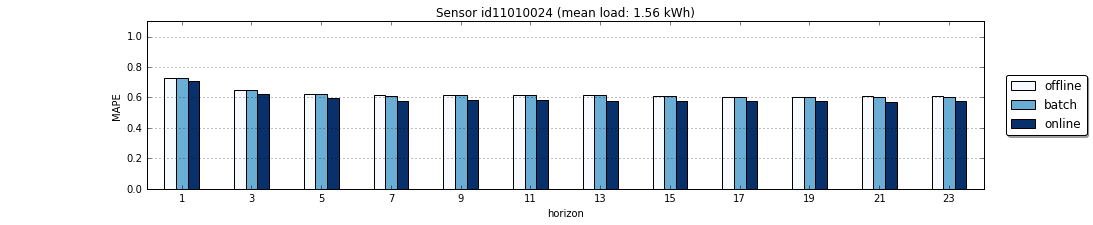

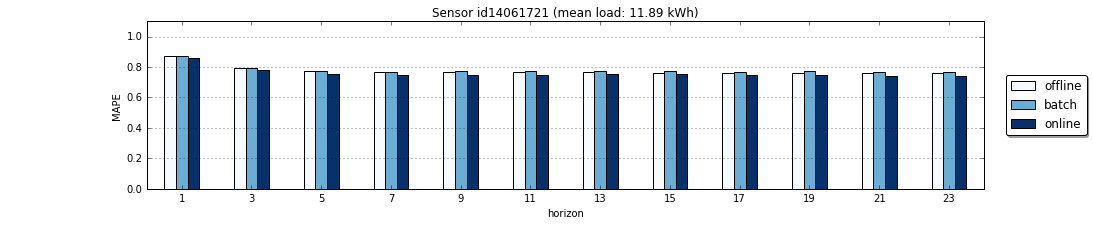

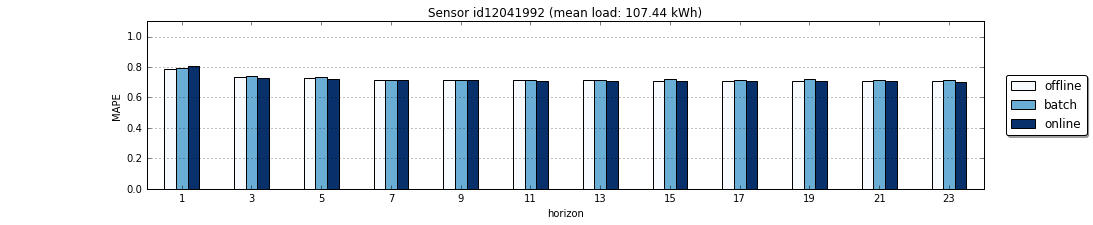

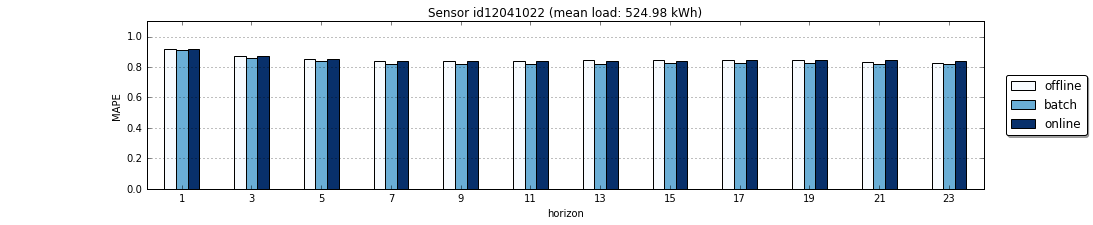

In [15]:
sensors = batch_df.columns.levels[0]

# iterate over all sensors
for idx, sensor in enumerate(sensors_properties):
    sensor = sensor['id']
    
    ax = df.xs(['AR_WF_DT', "Ridge Regression"],level=["dataset","model"]).xs(
        ["R2", sensor], level=['results', 'sensor'], axis=1).loc[range(1, 24,2)].plot(
        kind='bar', figsize=(15,3), colormap='Blues', ylim=(0,1.1), title=sensor)
    
    # add results to bar plot
    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.2
            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.03, height), fontsize=9, ha='center', rotation=90)

    # plot properties
    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_ylabel(error_metric)
    ax.set_title("Sensor {} (mean load: {})".format(sensor,sensors_properties[idx]['mean_load']))
    plt.legend(loc='right', bbox_to_anchor=(1.13,0.5), ncol=1, fancybox=True, shadow=True)

In [17]:
df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='results', axis=1)

approach    offline                                       batch             \
sensor   id11010024 id14061721 id12041992 id12041022 id12041992 id11010024   
horizon                                                                      
1             40.70      23.67      15.41       8.49      14.34      38.06   
2             44.82      26.11      17.03      10.59        nan        nan   
3             44.77      27.83      17.65      11.33      16.00      43.52   
4             45.40      28.66      18.06      12.28        nan        nan   
5             44.98      29.74      17.93      12.48      16.24      43.64   
6             45.15      30.10      18.31      12.26        nan        nan   
7             46.16      31.48      18.46      12.30      16.86      44.28   
8             46.52      31.61      18.56      12.67        nan        nan   
9             45.99      32.92      18.43      12.35      16.63      44.40   
10            47.10      33.57      18.21      12.36        nan        nan   
11            47.84      33.60      18.21      12.52      16.59      45.96   
12            46.95      31.46      18.27      12.42        nan        nan   
13            45.34      31.53      18.09      12.18      16.46      44.42   
14            44.67      31.88      18.13      12.57        nan        nan   
15            45.08      31.38      18.21      12.64      16.55      44.98   
16            45.52      31.20      18.39      12.54        nan        nan   
17            45.28      31.28      18.40      12.78      16.57      45.68   
18            45.63      31.03      18.39      12.77        nan        nan   
19            45.39      30.56      18.26      13.03      16.58      45.91   
20            46.24      30.32      18.20      12.78        nan        nan   
21            44.47      30.36      18.22      12.76      16.64      45.94   
22            44.97      30.84      18.37      12.58        nan        nan   
23            45.90      30.98      18.21      12.91      16.67      46.45   
24            46.63      31.10      18.40      12.90        nan        nan   

approach                           online                                   
sensor   id14061721 id12041022 id12041992 id11010024 id14061721 id12041022  
horizon                                                                     
1             19.24       7.57      12.96      32.59      19.44      11.75  
2               nan        nan      14.47      34.74      21.22      13.34  
3             22.13      10.01      15.12      35.05      22.24      14.58  
4               nan        nan      15.47      35.49      23.46      15.20  
5             23.70      10.55      15.61      35.55      23.62      15.57  
6               nan        nan      15.94      36.21      24.07      15.71  
7             24.36      10.93      16.06      36.32      24.36      15.86  
8               nan        nan      15.98      36.75      24.61      16.04  
9             24.26      10.87      15.98      36.71      24.94      16.26  
10              nan        nan      15.89      36.88      25.05      16.24  
11            24.47      10.95      15.91      36.89      24.87      16.11  
12              nan        nan      15.98      37.22      25.06      16.40  
13            24.51      10.98      15.91      37.06      25.21      16.55  
14              nan        nan      16.04      36.75      25.08      16.39  
15            25.07      11.19      16.03      36.94      25.14      16.47  
16              nan        nan      15.91      36.73      25.03      16.22  
17            25.10      11.10      15.97      36.70      24.88      16.23  
18              nan        nan      15.85      36.69      25.03      16.30  
19            25.28      11.08      15.86      36.71      25.17      16.53  
20              nan        nan      15.78      36.83      25.57      16.47  
21            25.18      11.30      15.75      37.02      25.63      16.53  
22              nan        nan      15.70    

In [18]:
df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='results', axis=1).loc[range(1, 24,2)]

approach    offline                                       batch             \
sensor   id11010024 id14061721 id12041992 id12041022 id12041992 id11010024   
horizon                                                                      
1             40.70      23.67      15.41       8.49      14.34      38.06   
3             44.77      27.83      17.65      11.33      16.00      43.52   
5             44.98      29.74      17.93      12.48      16.24      43.64   
7             46.16      31.48      18.46      12.30      16.86      44.28   
9             45.99      32.92      18.43      12.35      16.63      44.40   
11            47.84      33.60      18.21      12.52      16.59      45.96   
13            45.34      31.53      18.09      12.18      16.46      44.42   
15            45.08      31.38      18.21      12.64      16.55      44.98   
17            45.28      31.28      18.40      12.78      16.57      45.68   
19            45.39      30.56      18.26      13.03      16.58      45.91   
21            44.47      30.36      18.22      12.76      16.64      45.94   
23            45.90      30.98      18.21      12.91      16.67      46.45   

approach                           online                                   
sensor   id14061721 id12041022 id12041992 id11010024 id14061721 id12041022  
horizon                                                                     
1             19.24       7.57      12.96      32.59      19.44      11.75  
3             22.13      10.01      15.12      35.05      22.24      14.58  
5             23.70      10.55      15.61      35.55      23.62      15.57  
7             24.36      10.93      16.06      36.32      24.36      15.86  
9             24.26      10.87      15.98      36.71      24.94      16.26  
11            24.47      10.95      15.91      36.89      24.87      16.11  
13            24.51      10.98      15.91      37.06      25.21      16.55  
15            25.07      11.19      16.03      36.94      25.14      16.47  
17            25.10      11.10      15.97      36.70      24.88      16.23  
19            25.28      11.08      15.86      36.71      25.17      16.53  
21            25.18      11.30      15.75      37.02      25.63      16.53  
23            24.67      11.46      15.55      37.03      25.79      16.32

In [19]:
df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(["MAPE", "id11010024"], level=['results', 'sensor'], axis=1).loc[range(1, 24,2)]

approach,offline,batch,online
horizon,,,
1,40.70,38.06,32.59
3,44.77,43.52,35.05
5,44.98,43.64,35.55
7,46.16,44.28,36.32
9,45.99,44.40,36.71
11,47.84,45.96,36.89
13,45.34,44.42,37.06
15,45.08,44.98,36.94
17,45.28,45.68,36.70


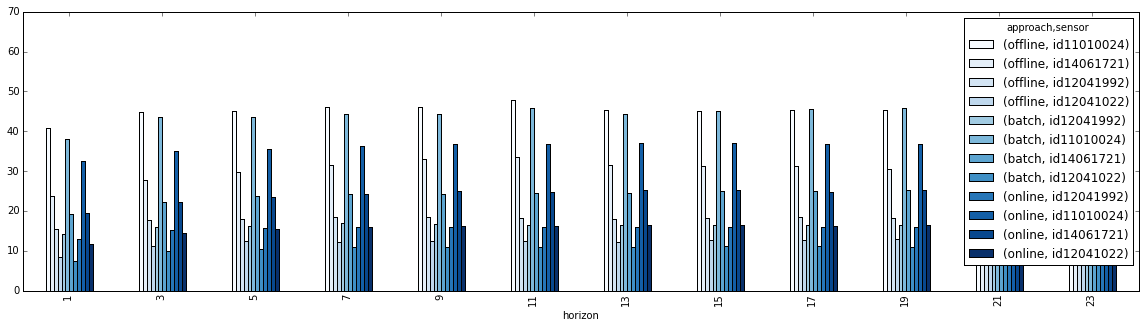

In [20]:
df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='results', axis=1).loc[range(1, 24,2)].plot(
    kind='bar', figsize=(20,5), colormap='Blues', ylim=(0,70))

### Work in progress

merge all evaluation results for different approaches (offline, bathc and online)

In [141]:
test1 = validation_df.drop(['true', 'predicted'], axis=1, level=1)
test2 = validation_df.drop(['true', 'predicted'], axis=1, level=1)

test = pd.concat([test1, test2, test2], axis=1, keys=['offline', 'batch', 'online'], names=['approach'])
#test = pd.concat([test1, test2, test2.loc[[1,5]]], axis=1, keys=['offline', 'batch', 'online'], names=['approach'])
test

approach                                     offline                         \
sensor                                    id12041992             id11010024   
results                                           R2   MAE  MAPE         R2   
horizon dataset       model                                                   
1.00    Last value    Baselines                 0.64 15.88 18.58       0.55   
        Previous day  Baselines                 0.38 19.92 23.42       0.12   
        Previous week Baselines                 0.55 17.40 20.38       0.43   
        AR_WF_DT      Ridge Regression          0.79 12.33 14.98       0.73   
                      K Nearest Neighbors       0.59 17.32 21.56       0.41   
                      Random Forest             0.81 11.88 14.34       0.79   
3.00    Last value    Baselines                 0.12 25.28 30.29       0.08   
        Previous day  Baselines                 0.38 19.92 23.41       0.12   
        Previous week Baselines                 0.55 17.40 20.38       0.43   
        AR_WF_DT      Ridge Regression          0.74 13.84 17.16       0.65   
                      K Nearest Neighbors       0.48 19.31 24.27       0.35   
                      Random Forest             0.77 12.90 16.00       0.75   
5.00    Last value    Baselines                -0.42 33.10 40.83      -0.37   
        Previous day  Baselines                 0.38 19.92 23.42       0.12   
        Previous week Baselines                 0.55 17.41 20.38       0.43   
        AR_WF_DT      Ridge Regression          0.73 14.08 17.55       0.62   
                      K Nearest Neighbors       0.44 20.09 25.35       0.30   
                      Random Forest             0.77 13.07 16.24       0.72   
7.00    Last value    Baselines                -1.06 41.86 52.89      -0.79   
        Previous day  Baselines                 0.38 19.93 23.43       0.12   
        Previous week Baselines                 0.55 17.41 20.39       0.43   
        AR_WF_DT      Ridge Regression          0.72 14.56 18.23       0.61   
                      K Nearest Neighbors       0.41 20.84 26.44       0.29   
                      Random Forest             0.75 13.43 16.86       0.71   
9.00    Last value    Baselines                -1.56 47.82 61.08      -1.15   
        Previous day  Baselines                 0.38 19.93 23.43       0.12   
        Previous week Baselines                 0.55 17.40 20.38       0.43   
        AR_WF_DT      Ridge Regression          0.72 14.54 18.16       0.61   
                      K Nearest Neighbors       0.43 20.45 25.92       0.31   
                      Random Forest             0.76 13.34 16.63       0.73   
...                                              ...   ...   ...        ...   
15.00   Last value    Baselines                -1.62 48.46 64.04      -1.23   
        Previous day  Baselines                 0.39 19.85 23.31       0.13   
        Previous week Baselines                 0.55 17.39 20.37       0.43   
        AR_WF_DT      Ridge Regression          0.72 14.50 18.01       0.61   
                      K Nearest Neighbors       0.44 20.34 25.51       0.30   
                      Random Forest             0.76 13.33 16.55       0.71   
17.00   Last value    Baselines                -1.17 43.12 57.44      -0.97   
        Previous day  Baselines                 0.38 19.85 23.34       0.13   
        Previous week Baselines                 0.55 17.36 20.37       0.43   
        AR_WF_DT      Ridge Regression          0.72 14.47 18.01       0.60   
                      K Nearest Neighbors       0.42 20.52 26.01       0.30   
                      Random Forest             0.75 13.33 16.57       0.71   
19.00   Last value    Baselines                -0.63 35.83 47.14      -0.63   
        Previous day  Baselines                 0.38 19.86 23.34       0.13   
        Previous week Baselines                 0.55 17.36 20.35       0.43   
        AR_WF_DT      Ridge Regression          0.

Average over all horizons

In [142]:
test.groupby(level=['dataset', 'model'], sort=False).mean()

approach                             offline                              \
sensor                            id12041992             id11010024        
results                                   R2   MAE  MAPE         R2  MAE   
dataset       model                                                        
Last value    Baselines                -0.76 36.89 47.16      -0.63 1.35   
Previous day  Baselines                 0.38 19.90 23.38       0.13 0.87   
Previous week Baselines                 0.55 17.38 20.37       0.43 0.70   
AR_WF_DT      Ridge Regression          0.73 14.23 17.69       0.62 0.72   
              K Nearest Neighbors       0.45 20.03 25.24       0.32 0.93   
              Random Forest             0.76 13.16 16.35       0.73 0.55   

approach                                                            batch  \
sensor                                   id14061721            id12041992   
results                             MAPE         R2  MAE  MAPE         R2   
dataset       model                                                         
Last value    Baselines           117.31      -0.33 3.36 67.01      -0.76   
Previous day  Baselines            90.47       0.40 2.02 41.37       0.38   
Previous week Baselines            58.06       0.66 1.56 30.63       0.55   
AR_WF_DT      Ridge Regression     71.71       0.78 1.50 35.86       0.73   
              K Nearest Neighbors  79.26       0.61 1.87 42.65       0.45   
              Random Forest        44.44       0.85 1.13 24.00       0.76   

approach                           ...                 online              \
sensor                             ...  id14061721 id12041992               
results                            ...        MAPE         R2   MAE  MAPE   
dataset       model                ...                                      
Last value    Baselines            ...       67.01      -0.76 36.89 47.16   
Previous day  Baselines            ...       41.37       0.38 19.90 23.38   
Previous week Baselines            ...       30.63       0.55 17.38 20.37   
AR_WF_DT      Ridge Regression     ...       35.86       0.73 14.23 17.69   
              K Nearest Neighbors  ...       42.65       0.45 20.03 25.24   
              Random Forest        ...       24.00       0.76 13.16 16.35   

approach                                                                        
sensor                            id11010024             id14061721             
results                                   R2  MAE   MAPE         R2  MAE  MAPE  
dataset       model                                                             
Last value    Baselines                -0.63 1.35 117.31      -0.33 3.36 67.01  
Previous day  Baselines                 0.13 0.87  90.47       0.40 2.02 41.37  
Previous week Baselines                 0.43 0.70  58.06       0.66 1.56 30.63  
AR_WF_DT      Ridge Regression          0.62 0.72  71.71       0.78 1.50 35.86  
              K Nearest Neighbors       0.32 0.93  79.26       0.61 1.87 42.65  
              Random Forest             0.73 0.55  44.44       0.85 1.13 24.00  

[6 rows x 27 columns]

In [209]:
test.groupby(level=['dataset', 'model'], sort=False).mean().loc['AR_WF_DT'].xs(["id12041992", "R2"], level=['sensor', "results"], axis=1)

approach,offline,batch,online
model,,,
Ridge Regression,0.73,0.73,0.73
K Nearest Neighbors,0.45,0.45,0.45
Random Forest,0.76,0.76,0.76


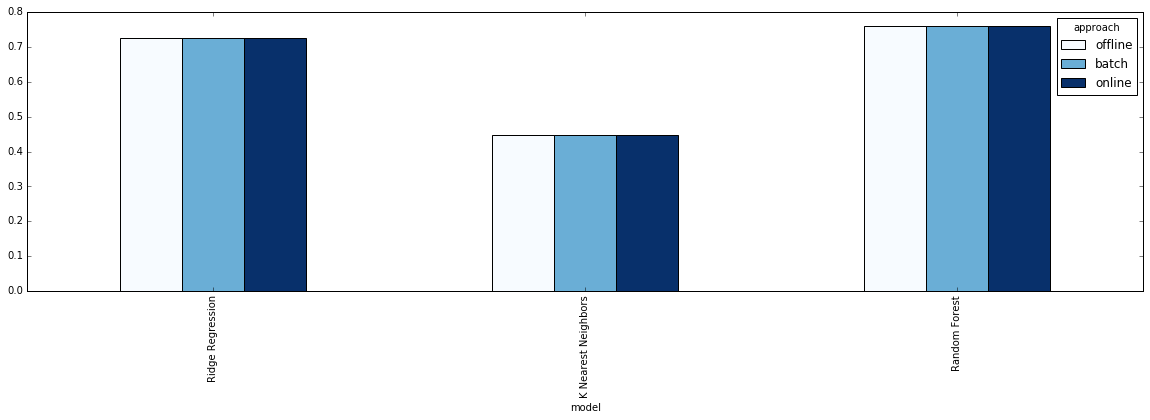

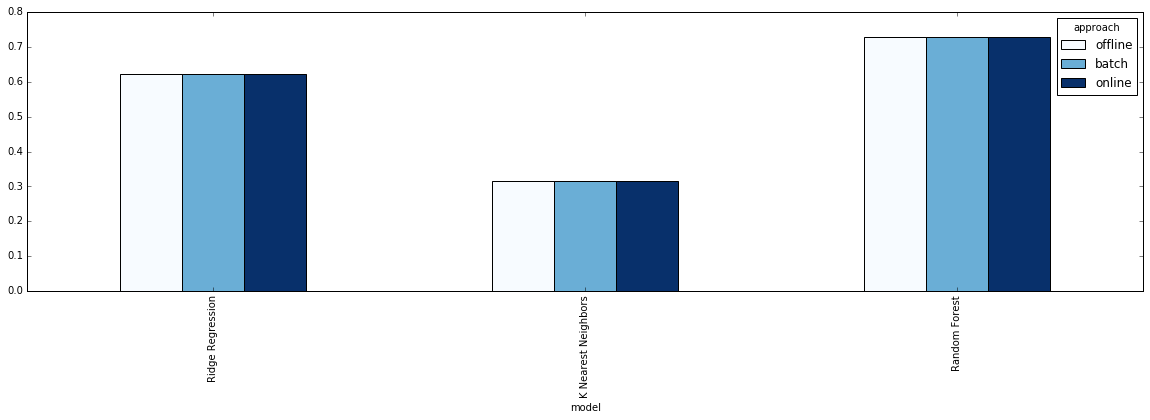

In [211]:
test.groupby(level=['dataset', 'model'], sort=False).mean().loc['AR_WF_DT'].xs(["id12041992", "R2"], level=['sensor', "results"], axis=1).plot(
    kind='bar', figsize=(20,5), colormap='Blues')

test.groupby(level=['dataset', 'model'], sort=False).mean().loc['AR_WF_DT'].xs(["id11010024", "R2"], level=['sensor', "results"], axis=1).plot(
    kind='bar', figsize=(20,5), colormap='Blues')

In [283]:
test.groupby(level=['dataset', 'model'], sort=False).mean().xs("id12041992", level='sensor', axis=1)

approach                          offline             batch              \
results                                R2   MAE  MAPE    R2   MAE  MAPE   
dataset       model                                                       
Last value    Baselines             -0.76 36.89 47.16 -0.76 36.89 47.16   
Previous day  Baselines              0.38 19.90 23.38  0.38 19.90 23.38   
Previous week Baselines              0.55 17.38 20.37  0.55 17.38 20.37   
AR_WF_DT      Ridge Regression       0.73 14.23 17.69  0.73 14.23 17.69   
              K Nearest Neighbors    0.45 20.03 25.24  0.45 20.03 25.24   
              Random Forest          0.76 13.16 16.35  0.76 13.16 16.35   

approach                          online              
results                               R2   MAE  MAPE  
dataset       model                                   
Last value    Baselines            -0.76 36.89 47.16  
Previous day  Baselines             0.38 19.90 23.38  
Previous week Baselines             0.55 17.38 20.37  
AR_WF_DT      Ridge Regression      0.73 14.23 17.69  
              K Nearest Neighbors   0.45 20.03 25.24  
              Random Forest         0.76 13.16 16.35

In [278]:
a = test.groupby(level=['dataset', 'model'], sort=False).mean().xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1).unstack(0)
a

approach             offline                                          batch  \
dataset             AR_WF_DT Last value Previous day Previous week AR_WF_DT   
model                                                                         
Baselines                nan      -0.76         0.38          0.55      nan   
K Nearest Neighbors     0.45        nan          nan           nan     0.45   
Random Forest           0.76        nan          nan           nan     0.76   
Ridge Regression        0.73        nan          nan           nan     0.73   

approach                                                    online             \
dataset             Last value Previous day Previous week AR_WF_DT Last value   
model                                                                           
Baselines                -0.76         0.38          0.55      nan      -0.76   
K Nearest Neighbors        nan          nan           nan     0.45        nan   
Random Forest              nan          nan           nan     0.76        nan   
Ridge Regression           nan          nan           nan     0.73        nan   

approach                                        
dataset             Previous day Previous week  
model                                           
Baselines                   0.38          0.55  
K Nearest Neighbors          nan           nan  
Random Forest                nan           nan  
Ridge Regression             nan           nan

In [300]:
offline = test.groupby(level=['dataset', 'model'], sort=False).mean().xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1)['offline'].unstack(0)
offline.rename(columns={'AR_WF_DT': 'offline'}, inplace=True)
offline

dataset,offline,Last value,Previous day,Previous week
model,,,,
Baselines,nan,-0.76,0.38,0.55
K Nearest Neighbors,0.45,nan,nan,nan
Random Forest,0.76,nan,nan,nan
Ridge Regression,0.73,nan,nan,nan


In [298]:
batch = test.groupby(level=['dataset', 'model'], sort=False).mean().xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1)['batch'].unstack(0)
batch.rename(columns={'AR_WF_DT': 'batch'}, inplace=True)
batch

dataset,batch,Last value,Previous day,Previous week
model,,,,
Baselines,nan,-0.76,0.38,0.55
K Nearest Neighbors,0.45,nan,nan,nan
Random Forest,0.76,nan,nan,nan
Ridge Regression,0.73,nan,nan,nan


In [307]:
online = test.groupby(level=['dataset', 'model'], sort=False).mean().xs(["id12041992", "R2"], level=['sensor', 'results'], axis=1)['batch'].unstack(0)
online.rename(columns={'AR_WF_DT': 'online'}, inplace=True)
online

dataset,online,Last value,Previous day,Previous week
model,,,,
Baselines,nan,-0.76,0.38,0.55
K Nearest Neighbors,0.45,nan,nan,nan
Random Forest,0.76,nan,nan,nan
Ridge Regression,0.73,nan,nan,nan


In [581]:
m

dataset,Last value,Previous day,Previous week,batch,offline,online
model,,,,,,
Baselines,-0.35,0.39,0.65,nan,nan,nan
K Nearest Neighbors,nan,nan,nan,0.61,0.56,0.61
Random Forest,nan,nan,nan,0.85,0.83,0.85
Ridge Regression,nan,nan,nan,0.78,0.77,0.78


In [582]:
new = ['Baselines', 'Ridge Regression', 'K Nearest Neighbors', 'Random Forest']
m.reindex(index=new)

dataset,Last value,Previous day,Previous week,batch,offline,online
model,,,,,,
Baselines,-0.35,0.39,0.65,nan,nan,nan
Ridge Regression,nan,nan,nan,0.78,0.77,0.78
K Nearest Neighbors,nan,nan,nan,0.61,0.56,0.61
Random Forest,nan,nan,nan,0.85,0.83,0.85


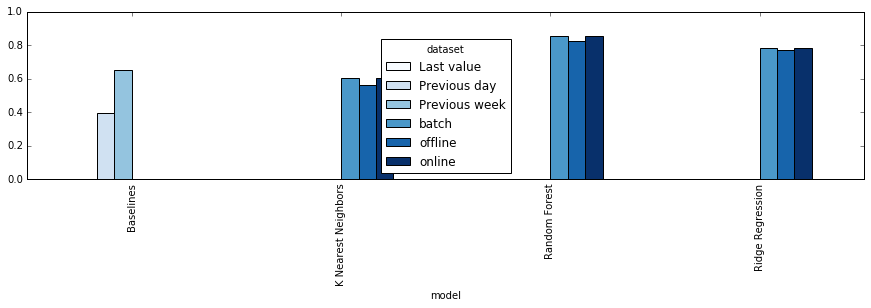

In [580]:
m = pd.concat([offline[['Last value', 'Previous day', 'Previous week']], batch[['batch']], offline[['offline']], online[['online']]], axis=1)
m.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'])

In [221]:
properties['err_name']

'R2'

In [281]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs("id12041992", level='sensor', axis=1)

results                              R2   MAE  MAPE
dataset       model                                
Last value    Baselines           -0.76 36.89 47.16
Previous day  Baselines            0.38 19.90 23.38
Previous week Baselines            0.55 17.38 20.37
AR_WF_DT      Ridge Regression     0.73 14.23 17.69
              K Nearest Neighbors  0.45 20.03 25.24
              Random Forest        0.76 13.16 16.35

In [282]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs("id12041992", level='sensor', axis=1)[properties['err_name']].unstack(0)

dataset,AR_WF_DT,Last value,Previous day,Previous week
model,,,,
Baselines,nan,-0.76,0.38,0.55
K Nearest Neighbors,0.45,nan,nan,nan
Random Forest,0.76,nan,nan,nan
Ridge Regression,0.73,nan,nan,nan


In [568]:
a = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs("id12041992", level='sensor', axis=1)[properties['err_name']].unstack(0)

a = temp_df.reindex(validation_df.index.get_level_values(2).unique())
a = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

a

dataset,Last value,Previous day,Previous week,AR,AR_WC_WF,AR_DT,AR_WC_DT,AR_WF_DT,ALL,TOP_20,TOP_10
model,,,,,,,,,,,
Baselines,-0.57,0.30,0.54,nan,nan,nan,nan,nan,nan,nan,nan
K Nearest Neighbors,nan,nan,nan,nan,nan,nan,nan,0.46,nan,nan,nan
Random Forest,nan,nan,nan,nan,nan,nan,nan,0.78,nan,nan,nan
Ridge Regression,nan,nan,nan,nan,nan,nan,nan,0.71,nan,nan,nan


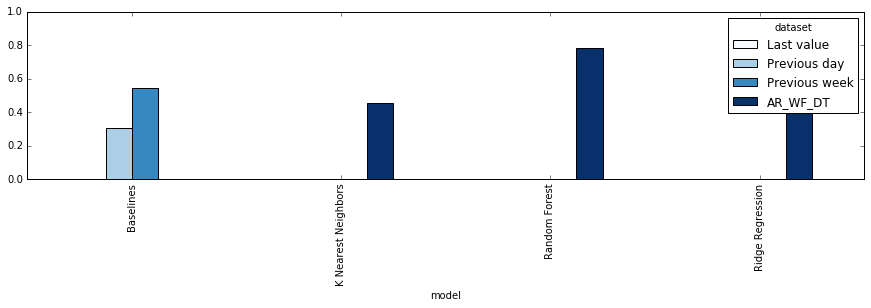

In [241]:
a.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'])

In [232]:
temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

#temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
#temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

temp_df

dataset,AR_WF_DT,Last value,Previous day,Previous week
model,,,,
Baselines,nan,-0.57,0.30,0.54
K Nearest Neighbors,0.46,nan,nan,nan
Random Forest,0.78,nan,nan,nan
Ridge Regression,0.71,nan,nan,nan


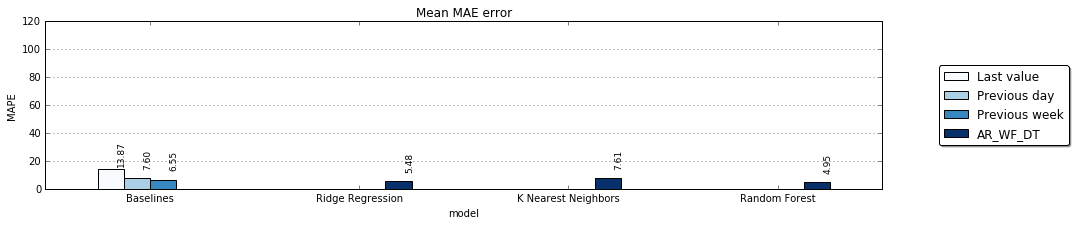

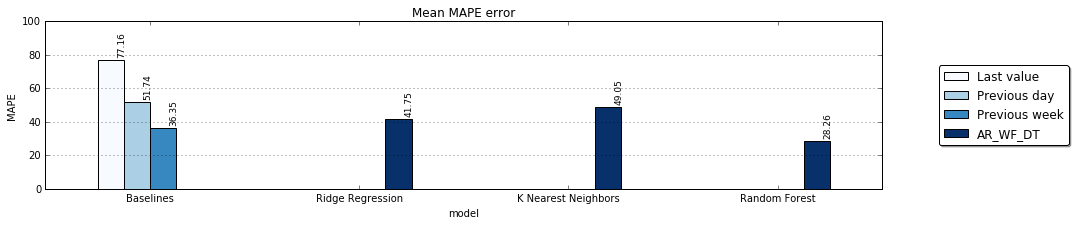

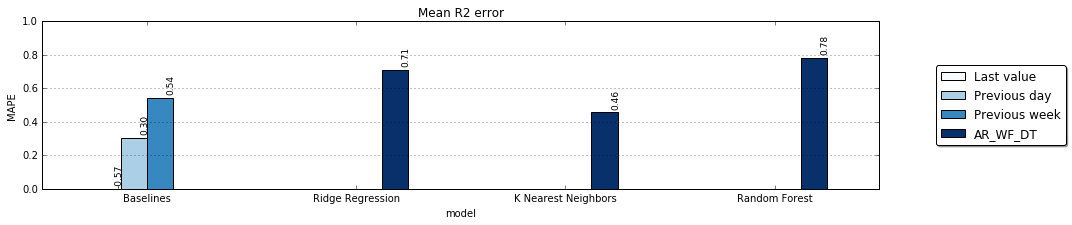

In [212]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    #{'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]


#for error_metric in validation_df.columns.get_level_values(1).unique():
for idx, properties in enumerate(validation_plot_properties):
    
    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    err = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).std()[properties['err_name']].unstack(0)
    
    ax = temp_df.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title("Mean {} error".format(properties['err_name']))
    ax.set_ylabel("MAPE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

In [160]:
test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"])

approach    offline                                                          \
sensor   id12041992             id11010024            id14061721              
results          R2   MAE  MAPE         R2  MAE  MAPE         R2  MAE  MAPE   
horizon                                                                       
1.00           0.81 11.88 14.34       0.79 0.47 38.06       0.91 0.91 19.24   
3.00           0.77 12.90 16.00       0.75 0.54 43.52       0.87 1.07 22.13   
5.00           0.77 13.07 16.24       0.72 0.56 43.64       0.85 1.13 23.70   
7.00           0.75 13.43 16.86       0.71 0.57 44.28       0.85 1.16 24.36   
9.00           0.76 13.34 16.63       0.73 0.56 44.40       0.85 1.16 24.26   
11.00          0.76 13.33 16.59       0.73 0.57 45.96       0.85 1.17 24.47   
13.00          0.76 13.25 16.46       0.73 0.56 44.42       0.85 1.16 24.51   
15.00          0.76 13.33 16.55       0.71 0.57 44.98       0.85 1.17 25.07   
17.00          0.75 13.33 16.57       0.71 0.57 45.68       0.85 1.16 25.10   
19.00          0.75 13.30 16.58       0.72 0.56 45.91       0.85 1.16 25.28   
21.00          0.75 13.36 16.64       0.72 0.56 45.94       0.85 1.15 25.18   
23.00          0.75 13.38 16.67       0.72 0.55 46.45       0.84 1.13 24.67   

approach      batch  ...                 online                              \
sensor   id12041992  ...  id14061721 id12041992             id11010024        
results          R2  ...        MAPE         R2   MAE  MAPE         R2  MAE   
horizon              ...                                                      
1.00           0.81  ...       19.24       0.81 11.88 14.34       0.79 0.47   
3.00           0.77  ...       22.13       0.77 12.90 16.00       0.75 0.54   
5.00           0.77  ...       23.70       0.77 13.07 16.24       0.72 0.56   
7.00           0.75  ...       24.36       0.75 13.43 16.86       0.71 0.57   
9.00           0.76  ...       24.26       0.76 13.34 16.63       0.73 0.56   
11.00          0.76  ...       24.47       0.76 13.33 16.59       0.73 0.57   
13.00          0.76  ...       24.51       0.76 13.25 16.46       0.73 0.56   
15.00          0.76  ...       25.07       0.76 13.33 16.55       0.71 0.57   
17.00          0.75  ...       25.10       0.75 13.33 16.57       0.71 0.57   
19.00          0.75  ...       25.28       0.75 13.30 16.58       0.72 0.56   
21.00          0.75  ...       25.18       0.75 13.36 16.64       0.72 0.56   
23.00          0.75  ...       24.67       0.75 13.38 16.67       0.72 0.55   

approach                              
sensor         id14061721             
results   MAPE         R2  MAE  MAPE  
horizon                               
1.00     38.06       0.91 0.91 19.24  
3.00     43.52       0.87 1.07 22.13  
5.00     43.64       0.85 1.13 23.70  
7.00     44.28       0.85 1.16 24.36  
9.00     44.40       0.85 1.16 24.26  
11.00    45.96       0.85 1.17 24.47  
13.00    44.42       0.85 1.16 24.51  
15.00    44.98       0.85 1.17 25.07  
17.00    45.68       0.85 1.16 25.10  
19.00    45.91       0.85 1.16 25.28  
21.00    45.94       0.85 1.15 25.18  
23.00    46.45       0.84 1.13 24.67  

[12 rows x 27 columns]

In [163]:
test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"])

approach    offline                                                          \
sensor   id12041992             id11010024            id14061721              
results          R2   MAE  MAPE         R2  MAE  MAPE         R2  MAE  MAPE   
horizon                                                                       
1.00           0.81 11.88 14.34       0.79 0.47 38.06       0.91 0.91 19.24   
3.00           0.77 12.90 16.00       0.75 0.54 43.52       0.87 1.07 22.13   
5.00           0.77 13.07 16.24       0.72 0.56 43.64       0.85 1.13 23.70   
7.00           0.75 13.43 16.86       0.71 0.57 44.28       0.85 1.16 24.36   
9.00           0.76 13.34 16.63       0.73 0.56 44.40       0.85 1.16 24.26   
11.00          0.76 13.33 16.59       0.73 0.57 45.96       0.85 1.17 24.47   
13.00          0.76 13.25 16.46       0.73 0.56 44.42       0.85 1.16 24.51   
15.00          0.76 13.33 16.55       0.71 0.57 44.98       0.85 1.17 25.07   
17.00          0.75 13.33 16.57       0.71 0.57 45.68       0.85 1.16 25.10   
19.00          0.75 13.30 16.58       0.72 0.56 45.91       0.85 1.16 25.28   
21.00          0.75 13.36 16.64       0.72 0.56 45.94       0.85 1.15 25.18   
23.00          0.75 13.38 16.67       0.72 0.55 46.45       0.84 1.13 24.67   

approach      batch  ...                 online                              \
sensor   id12041992  ...  id14061721 id12041992             id11010024        
results          R2  ...        MAPE         R2   MAE  MAPE         R2  MAE   
horizon              ...                                                      
1.00           0.81  ...       19.24       0.81 11.88 14.34       0.79 0.47   
3.00           0.77  ...       22.13       0.77 12.90 16.00       0.75 0.54   
5.00           0.77  ...       23.70       0.77 13.07 16.24       0.72 0.56   
7.00           0.75  ...       24.36       0.75 13.43 16.86       0.71 0.57   
9.00           0.76  ...       24.26       0.76 13.34 16.63       0.73 0.56   
11.00          0.76  ...       24.47       0.76 13.33 16.59       0.73 0.57   
13.00          0.76  ...       24.51       0.76 13.25 16.46       0.73 0.56   
15.00          0.76  ...       25.07       0.76 13.33 16.55       0.71 0.57   
17.00          0.75  ...       25.10       0.75 13.33 16.57       0.71 0.57   
19.00          0.75  ...       25.28       0.75 13.30 16.58       0.72 0.56   
21.00          0.75  ...       25.18       0.75 13.36 16.64       0.72 0.56   
23.00          0.75  ...       24.67       0.75 13.38 16.67       0.72 0.55   

approach                              
sensor         id14061721             
results   MAPE         R2  MAE  MAPE  
horizon                               
1.00     38.06       0.91 0.91 19.24  
3.00     43.52       0.87 1.07 22.13  
5.00     43.64       0.85 1.13 23.70  
7.00     44.28       0.85 1.16 24.36  
9.00     44.40       0.85 1.16 24.26  
11.00    45.96       0.85 1.17 24.47  
13.00    44.42       0.85 1.16 24.51  
15.00    44.98       0.85 1.17 25.07  
17.00    45.68       0.85 1.16 25.10  
19.00    45.91       0.85 1.16 25.28  
21.00    45.94       0.85 1.15 25.18  
23.00    46.45       0.84 1.13 24.67  

[12 rows x 27 columns]

In [164]:
test.groupby(level=['dataset', 'model'], sort=False).mean().xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"])

approach                  offline                                    \
sensor                 id12041992             id11010024              
results                        R2   MAE  MAPE         R2  MAE  MAPE   
dataset  model                                                        
AR_WF_DT Random Forest       0.76 13.16 16.35       0.73 0.55 44.44   

approach                                          batch  ...              \
sensor                 id14061721            id12041992  ...  id14061721   
results                        R2  MAE  MAPE         R2  ...        MAPE   
dataset  model                                           ...               
AR_WF_DT Random Forest       0.85 1.13 24.00       0.76  ...       24.00   

approach                   online                                    \
sensor                 id12041992             id11010024              
results                        R2   MAE  MAPE         R2  MAE  MAPE   
dataset  model                                                        
AR_WF_DT Random Forest       0.76 13.16 16.35       0.73 0.55 44.44   

approach                                      
sensor                 id14061721             
results                        R2  MAE  MAPE  
dataset  model                                
AR_WF_DT Random Forest       0.85 1.13 24.00  

[1 rows x 27 columns]

In [199]:
test.groupby(level=['dataset', 'model'], sort=False).mean().loc['AR_WF_DT']

approach               offline                                               \
sensor              id12041992             id11010024            id14061721   
results                     R2   MAE  MAPE         R2  MAE  MAPE         R2   
model                                                                         
Ridge Regression          0.73 14.23 17.69       0.62 0.72 71.71       0.78   
K Nearest Neighbors       0.45 20.03 25.24       0.32 0.93 79.26       0.61   
Random Forest             0.76 13.16 16.35       0.73 0.55 44.44       0.85   

approach                            batch  ...                 online        \
sensor                         id12041992  ...  id14061721 id12041992         
results              MAE  MAPE         R2  ...        MAPE         R2   MAE   
model                                      ...                                
Ridge Regression    1.50 35.86       0.73  ...       35.86       0.73 14.23   
K Nearest Neighbors 1.87 42.65       0.45  ...       42.65       0.45 20.03   
Random Forest       1.13 24.00       0.76  ...       24.00       0.76 13.16   

approach                                                               
sensor                    id11010024            id14061721             
results              MAPE         R2  MAE  MAPE         R2  MAE  MAPE  
model                                                                  
Ridge Regression    17.69       0.62 0.72 71.71       0.78 1.50 35.86  
K Nearest Neighbors 25.24       0.32 0.93 79.26       0.61 1.87 42.65  
Random Forest       16.35       0.73 0.55 44.44       0.85 1.13 24.00  

[3 rows x 27 columns]

In [152]:
test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='results', axis=1)

approach    offline                            batch                        \
sensor   id12041992 id11010024 id14061721 id12041992 id11010024 id14061721   
horizon                                                                      
1.00          14.34      38.06      19.24      14.34      38.06      19.24   
3.00          16.00      43.52      22.13      16.00      43.52      22.13   
5.00          16.24      43.64      23.70      16.24      43.64      23.70   
7.00          16.86      44.28      24.36      16.86      44.28      24.36   
9.00          16.63      44.40      24.26      16.63      44.40      24.26   
11.00         16.59      45.96      24.47      16.59      45.96      24.47   
13.00         16.46      44.42      24.51      16.46      44.42      24.51   
15.00         16.55      44.98      25.07      16.55      44.98      25.07   
17.00         16.57      45.68      25.10      16.57      45.68      25.10   
19.00         16.58      45.91      25.28      16.58      45.91      25.28   
21.00         16.64      45.94      25.18      16.64      45.94      25.18   
23.00         16.67      46.45      24.67      16.67      46.45      24.67   

approach     online                        
sensor   id12041992 id11010024 id14061721  
horizon                                    
1.00          14.34      38.06      19.24  
3.00          16.00      43.52      22.13  
5.00          16.24      43.64      23.70  
7.00          16.86      44.28      24.36  
9.00          16.63      44.40      24.26  
11.00         16.59      45.96      24.47  
13.00         16.46      44.42      24.51  
15.00         16.55      44.98      25.07  
17.00         16.57      45.68      25.10  
19.00         16.58      45.91      25.28  
21.00         16.64      45.94      25.18  
23.00         16.67      46.45      24.67

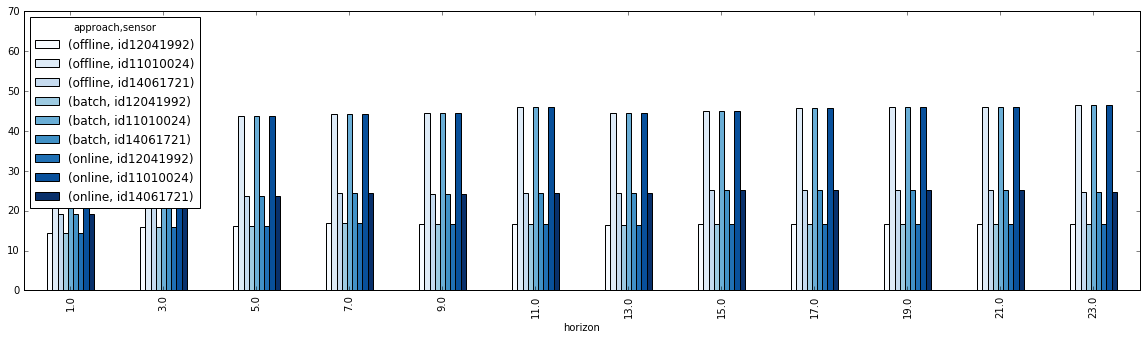

In [151]:
test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='results', axis=1).plot(
    kind='bar', figsize=(20,5), colormap='Blues', ylim=(0,70))

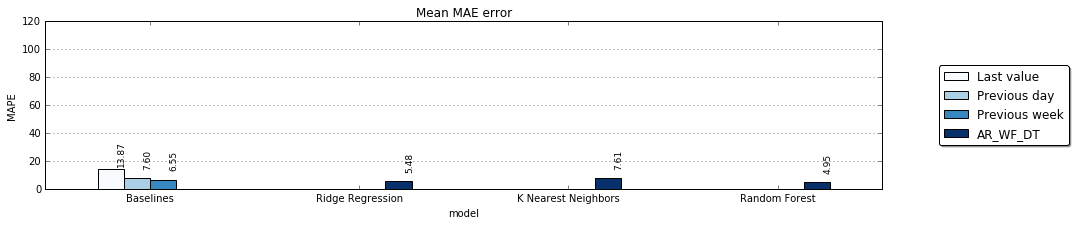

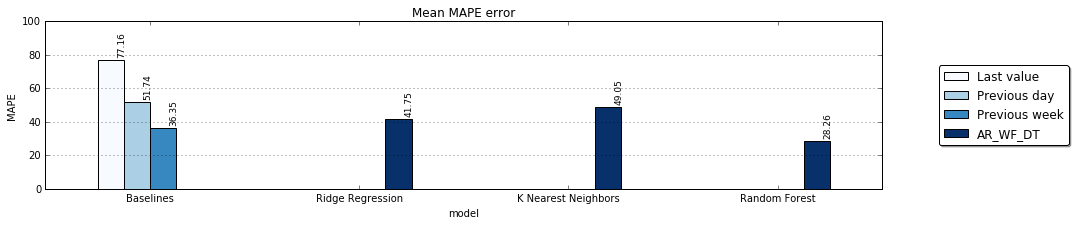

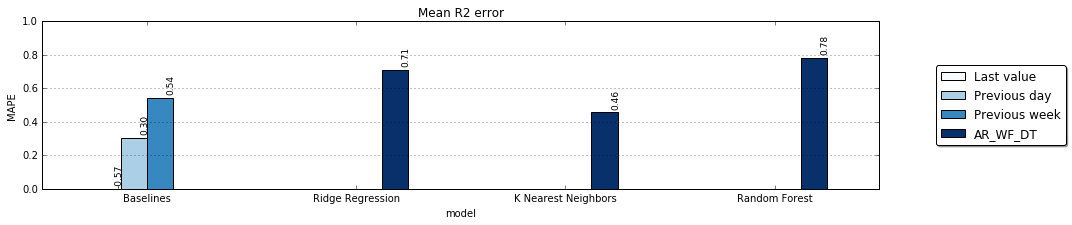

In [143]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    #{'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]


#for error_metric in validation_df.columns.get_level_values(1).unique():
for idx, properties in enumerate(validation_plot_properties):
    
    temp_df = test.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

    temp_df = temp_df.reindex(test.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(test.index.get_level_values(1).unique(), axis=1)

    err = test.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).std()[properties['err_name']].unstack(0)
    
    ax = temp_df.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title("Mean {} error".format(properties['err_name']))
    ax.set_ylabel("MAPE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

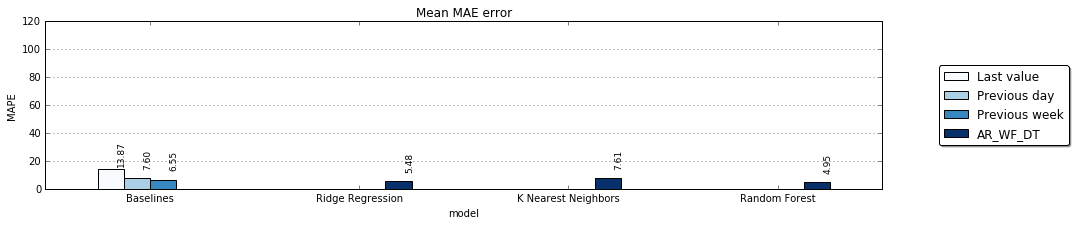

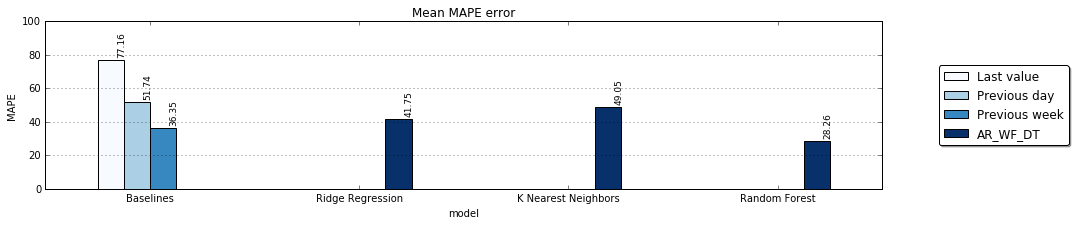

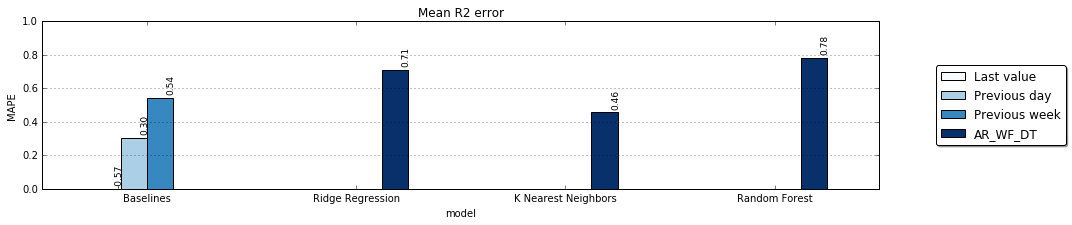

In [132]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    #{'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]


#for error_metric in validation_df.columns.get_level_values(1).unique():
for idx, properties in enumerate(validation_plot_properties):
    
    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    err = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='results', axis=1, sort=False).std()[properties['err_name']].unstack(0)
    
    ax = temp_df.plot(kind='bar',  colormap='Blues', figsize=(15,3), ylim=properties['lim'])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title("Mean {} error".format(properties['err_name']))
    ax.set_ylabel("MAPE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

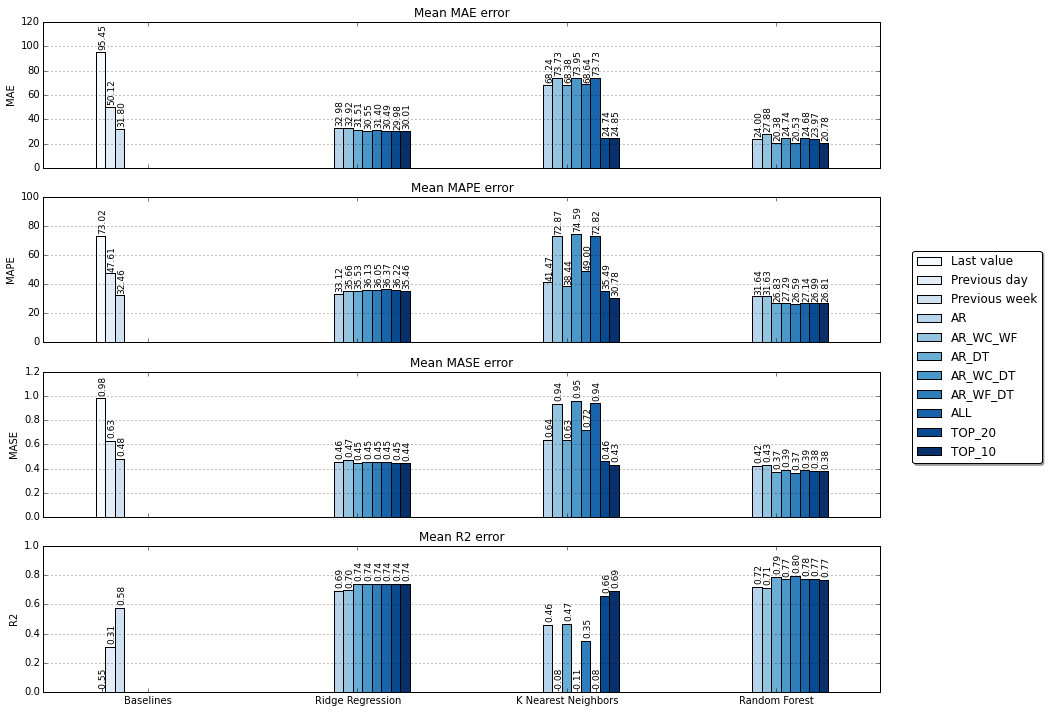

In [755]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    {'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]

f, axx = plt.subplots(4,1, sharex=True)
f.set_size_inches(15,4*3)

#for error_metric in validation_df.columns.get_level_values(1).unique():
for idx, properties in enumerate(validation_plot_properties):
    
    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='error metric', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    err = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='error metric', axis=1, sort=False).std()[properties['err_name']].unstack(0)
    
    ax = temp_df.plot(ax = axx[idx], kind='bar',  colormap='Blues', ylim=properties['lim'], legend=False)
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.xticks(rotation=0)
    ax.yaxis.grid(True)
    ax.set_title("Mean {} error".format(properties['err_name']))
    ax.set_ylabel(properties['err_name'])
    ax.set_xlabel("")

plt.legend(loc='right', bbox_to_anchor=(1.2, 2.3), ncol=1, fancybox=True, shadow=True) 
#plt.legend(loc='upper center', bbox_to_anchor=(-0.7, 2.5), ncol=4, fancybox=True, shadow=True)
#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.show()

## Evaluation for diferent sensors

### MAPE

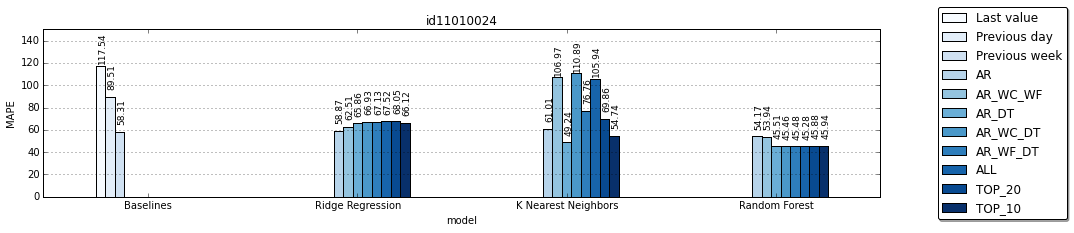

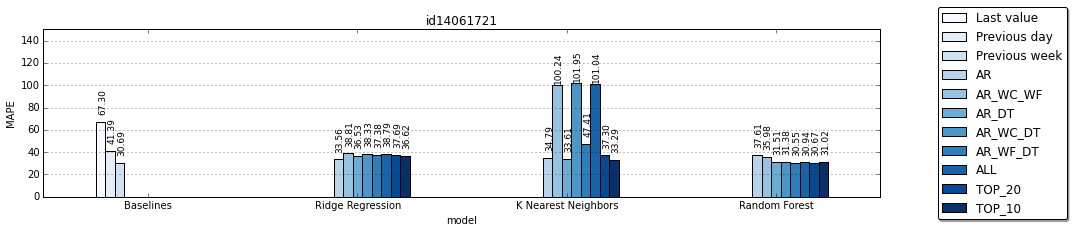

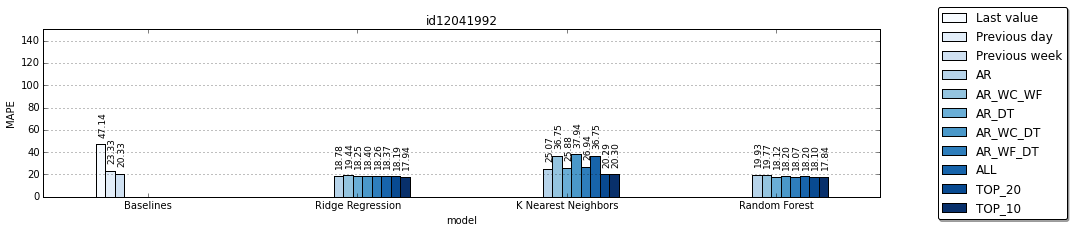

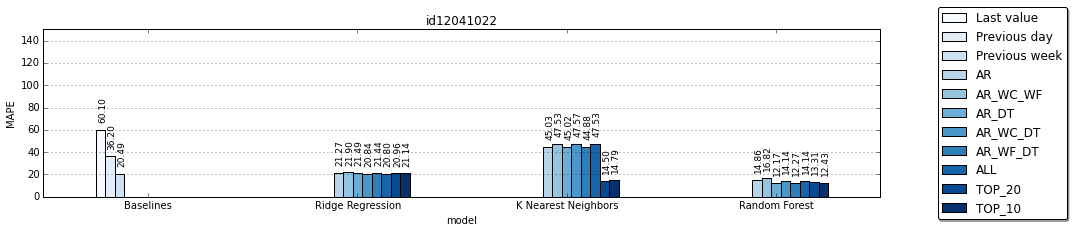

In [11]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["MAPE"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,150])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + 22 if p.get_y() >= 0 else 22*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("MAPE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

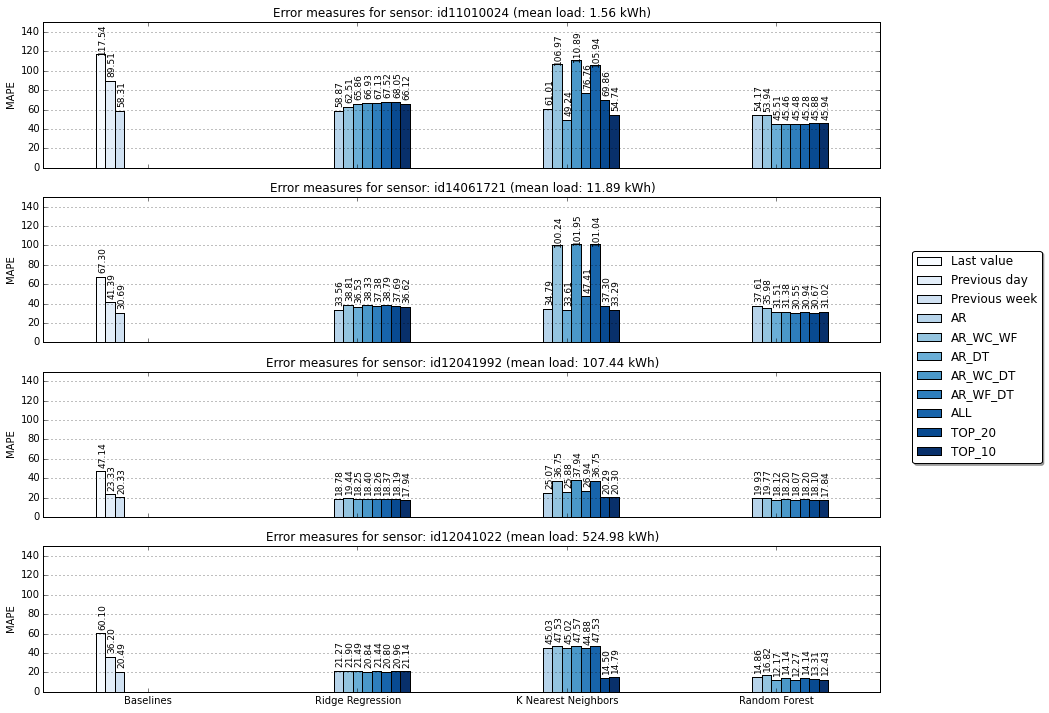

In [16]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

sensors = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16, 'mean_load': "1.56 kWh"},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13, 'mean_load': "11.89 kWh"},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12, 'mean_load': "107.44 kWh"},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1, 'mean_load': "524.98 kWh"},
    ]

f, axx = plt.subplots(4,1, sharex=True)
f.set_size_inches(15,4*3)


#for error_metric in validation_df.columns.get_level_values(1).unique():
for idx, sensor in enumerate(validation_df.columns.get_level_values(0).unique()):

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["MAPE"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(ax = axx[idx], kind='bar',  colormap='Blues', ylim=[0,150],  legend=False)
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:
        if p.get_height() != 0:
            label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
            height = p.get_height() + 22 if p.get_y() >= 0 else 22*1.1

            ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.xticks(rotation=0)
    ax.yaxis.grid(True)
    ax.set_title("Error measures for sensor: {} (mean load: {})".format(sensor,sensors[idx]['mean_load']))
    ax.set_ylabel("MAPE")
    ax.set_xlabel("")

plt.legend(loc='right', bbox_to_anchor=(1.2, 2.3), ncol=1, fancybox=True, shadow=True) 
#plt.legend(loc='upper center', bbox_to_anchor=(-0.7, 2.5), ncol=4, fancybox=True, shadow=True)
#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.show()

### MASE

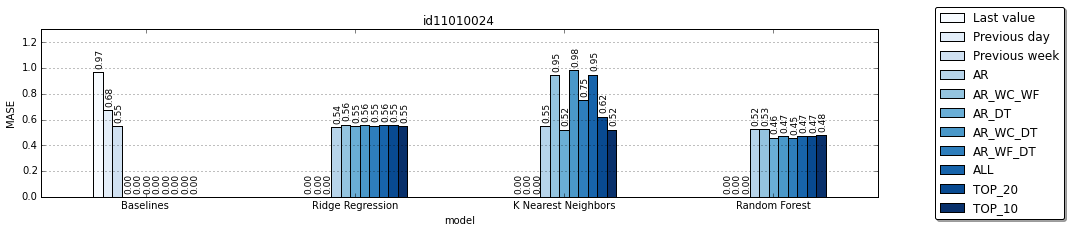

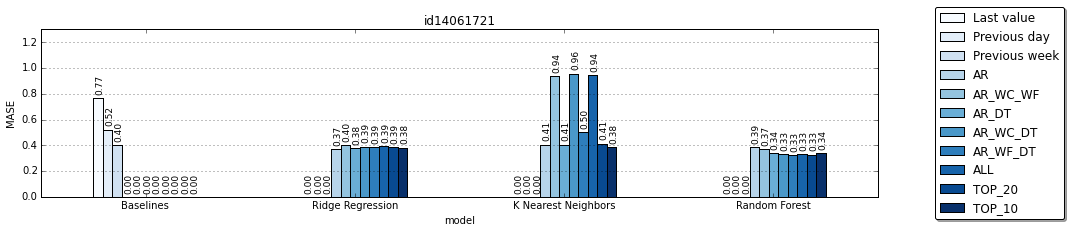

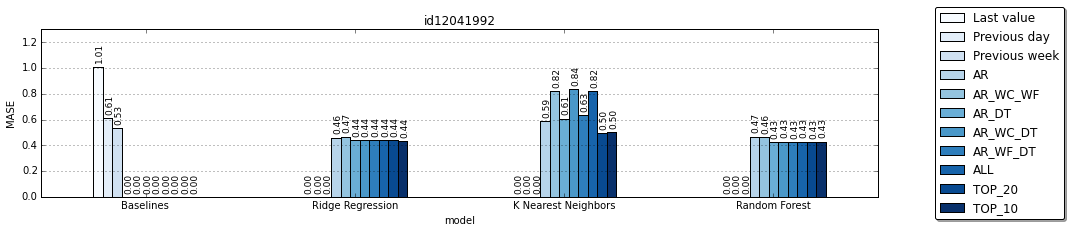

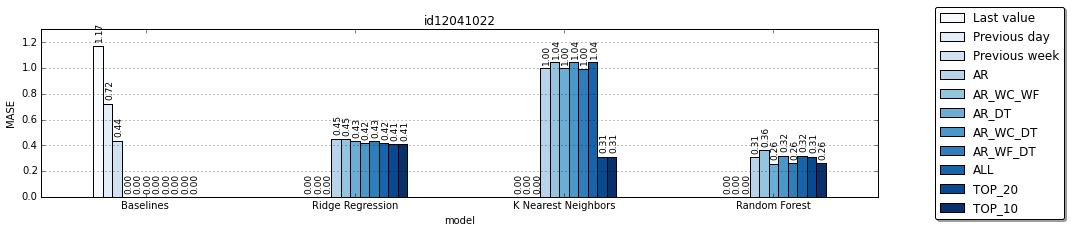

In [488]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["MASE"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,1.3])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 0.12 if p.get_y() >= 0 else 0.12*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("MASE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

### R2 

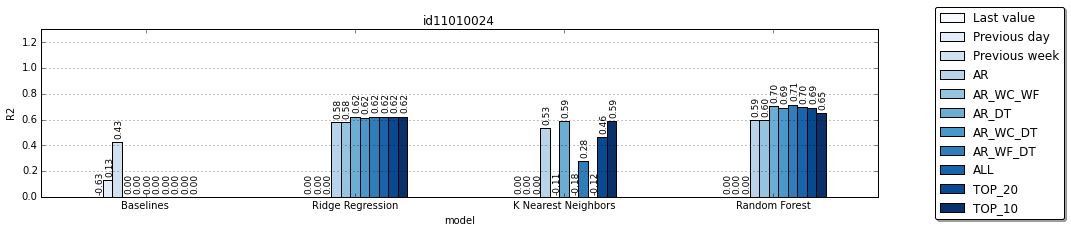

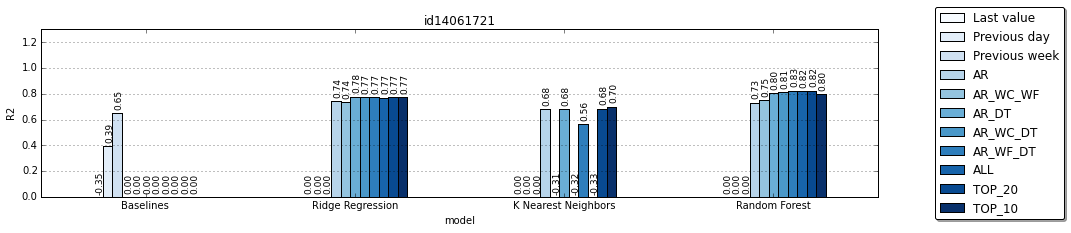

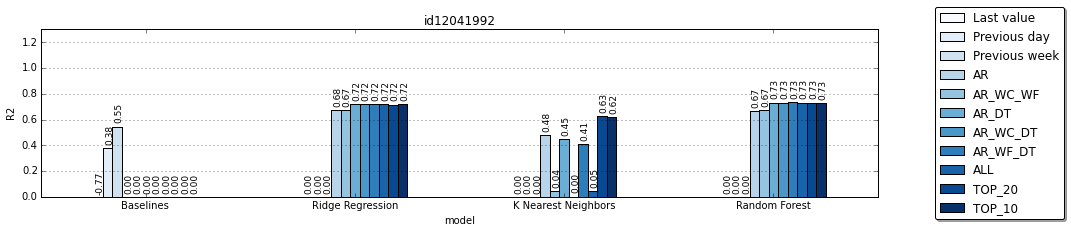

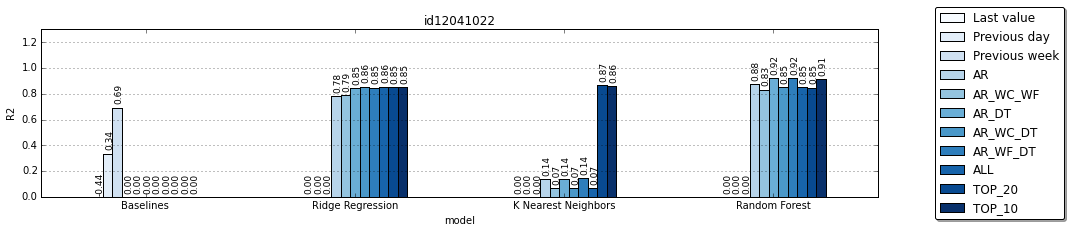

In [507]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["R2"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,1.3])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 0.12 if p.get_y() >= 0 else 0.12*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("R2")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

In [476]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean()

sensor                            id11010024                  id14061721       \
error metric                              R2  MAE   MAPE MASE         R2  MAE   
dataset       model                                                             
Last value    Baselines                -0.63 1.36 117.54 0.97      -0.35 3.35   
Previous day  Baselines                 0.13 0.87  89.51 0.68       0.39 2.01   
Previous week Baselines                 0.43 0.70  58.31 0.55       0.65 1.55   
AR            Ridge Regression          0.58 0.70  58.87 0.54       0.74 1.47   
              K Nearest Neighbors       0.53 0.71  61.01 0.55       0.68 1.60   
              Random Forest             0.59 0.68  54.17 0.52       0.73 1.55   
AR_WC_WF      Ridge Regression          0.58 0.73  62.51 0.56       0.74 1.58   
              K Nearest Neighbors      -0.11 1.21 106.97 0.95      -0.31 3.64   
              Random Forest             0.60 0.69  53.94 0.53       0.75 1.47   
AR_DT         Ridge Regression          0.62 0.71  65.86 0.55       0.78 1.50   
              K Nearest Neighbors       0.59 0.67  49.24 0.52       0.68 1.60   
              Random Forest             0.70 0.59  45.51 0.46       0.80 1.35   
AR_WC_DT      Ridge Regression          0.62 0.72  66.93 0.56       0.77 1.55   
              K Nearest Neighbors      -0.18 1.25 110.89 0.98      -0.32 3.68   
              Random Forest             0.69 0.61  45.46 0.47       0.81 1.32   
AR_WF_DT      Ridge Regression          0.62 0.71  67.13 0.55       0.77 1.53   
              K Nearest Neighbors       0.28 0.96  76.76 0.75       0.56 1.98   
              Random Forest             0.71 0.59  45.48 0.45       0.83 1.29   
ALL           Ridge Regression          0.62 0.72  67.52 0.56       0.77 1.56   
              K Nearest Neighbors      -0.12 1.21 105.94 0.95      -0.33 3.66   
              Random Forest             0.70 0.61  45.28 0.47       0.82 1.30   
TOP_20        Ridge Regression          0.62 0.72  68.05 0.55       0.77 1.53   
              K Nearest Neighbors       0.46 0.80  69.86 0.62       0.68 1.63   
              Random Forest             0.69 0.61  45.88 0.47       0.82 1.29   
TOP_10        Ridge Regression          0.62 0.71  66.12 0.55       0.77 1.51   
              K Nearest Neighbors       0.59 0.67  54.74 0.52       0.70 1.53   
              Random Forest             0.65 0.62  45.94 0.48       0.80 1.35   

sensor                                        id12041992                   \
error metric                        MAPE MASE         R2   MAE  MAPE MASE   
dataset       model                                                         
Last value    Baselines            67.30 0.77      -0.77 36.90 47.14 1.01   
Previous day  Baselines            41.39 0.52       0.38 19.85 23.33 0.61   
Previous week Baselines            30.69 0.40       0.55 17.35 20.33 0.53   
AR            Ridge Regression     33.56 0.37       0.68 15.17 18.78 0.46   
              K Nearest Neighbors  34.79 0.41       0.48 19.50 25.07 0.59   
              Random Forest        37.61 0.39       0.67 15.42 19.93 0.47   
AR_WC_WF      Ridge Regression     38.81 0.40       0.67 15.43 19.44 0.47   
              K Nearest Neighbors 100.24 0.94       0.04 26.92 36.75 0.82   
              Random Forest        35.98 0.37       0.67 15.30 19.77 0.46   
AR_DT         Ridge Regression     36.53 0.38       0.72 14.43 18.25 0.44   
              K Nearest Neighbors  33.61 0.41       0.45 20.10 25.88 0.61   
              Random Forest        31.51 0.34       0.73 14.02 18.12 0.43   
AR_WC_DT      Ridge Regression     38.33 0.39       0.72 14.54 18.40 0.44   
              K Nearest Neighbors 101.95 0.96       0.00 27.54 37.94 0.84   
              Random Forest        31.38 0.33       0.73 14.08 18.20 0.43   
AR_WF_DT      Ridge Regression     37.38 0.39       0.72 14.46 18.26 0.44   
              K Nearest Neighbors  47.41 0.50       0.41 20.93 26.94 0.63   
              Random Forest  

In [497]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).ix[['AR_WF_DT','AR']]

sensor                        id11010024  id14061721  id12041992  id12041022
dataset  model                                                              
AR_WF_DT Ridge Regression          67.13       37.38       18.26       21.44
         K Nearest Neighbors       76.76       47.41       26.94       44.88
         Random Forest             45.48       30.55       18.07       12.27
AR       Ridge Regression          58.87       33.56       18.78       21.27
         K Nearest Neighbors       61.01       34.79       25.07       45.03
         Random Forest             54.17       37.61       19.93       14.86

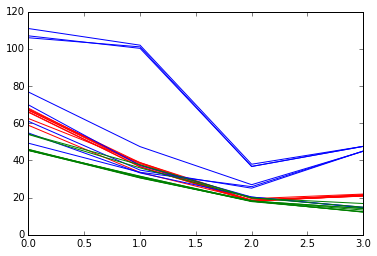

In [584]:
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('Ridge Regression',level="model",axis=0).transpose(),'r')
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('K Nearest Neighbors',level="model",axis=0).transpose(), 'b')
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('Random Forest',level="model",axis=0).transpose(), 'g')
# LEGEND??

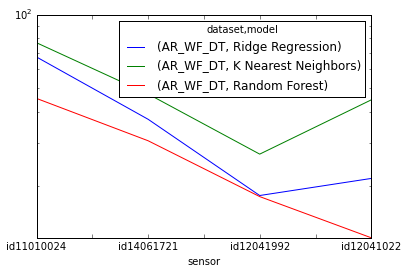

In [557]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).ix[['AR_WF_DT']].transpose().plot(logy=True, ylim=(0,100))

## Evaluation Scores Over All Horizons

In [23]:
validation_df.columns.get_level_values(1).unique()

Index([u'true', u'predicted', u'R2', u'MAE', u'MAPE'], dtype='object', name=u'results')

In [24]:
validation_df.index.get_level_values(2).unique()[1:4]

Index([u'Ridge Regression', u'K Nearest Neighbors', u'Random Forest'], dtype='object', name=u'model')

In [25]:
validation_df.xs('AR_WF_DT',level="dataset").groupby(level='results', axis=1).mean().unstack()["MAPE"].reindex_axis(
    validation_df.index.get_level_values(2).unique()[1:4], axis=1)

DataError: No numeric types to aggregate

### Average error for different horizons

In [29]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(level='results', axis=1, sort=False).mean()

results                             MAE  MAPE    R2
dataset       model                                
Last value    Baselines           13.87 77.16 -0.57
Previous day  Baselines            7.60 51.74  0.30
Previous week Baselines            6.55 36.35  0.54
AR_WF_DT      Ridge Regression     5.48 41.75  0.71
              K Nearest Neighbors  7.61 49.05  0.46
              Random Forest        4.95 28.26  0.78

In [33]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean()

sensor                            id12041992             id11010024       \
results                                   R2   MAE  MAPE         R2  MAE   
dataset       model                                                        
Last value    Baselines                -0.76 36.89 47.16      -0.63 1.35   
Previous day  Baselines                 0.38 19.90 23.38       0.13 0.87   
Previous week Baselines                 0.55 17.38 20.37       0.43 0.70   
AR_WF_DT      Ridge Regression          0.73 14.23 17.69       0.62 0.72   
              K Nearest Neighbors       0.45 20.03 25.24       0.32 0.93   
              Random Forest             0.76 13.16 16.35       0.73 0.55   

sensor                                   id14061721             
results                             MAPE         R2  MAE  MAPE  
dataset       model                                             
Last value    Baselines           117.31      -0.33 3.36 67.01  
Previous day  Baselines            90.47       0.40 2.02 41.37  
Previous week Baselines            58.06       0.66 1.56 30.63  
AR_WF_DT      Ridge Regression     71.71       0.78 1.50 35.86  
              K Nearest Neighbors  79.26       0.61 1.87 42.65  
              Random Forest        44.44       0.85 1.13 24.00

In [56]:
validation_df.xs('AR_WF_DT',level="dataset")['id12041992'][['R2', 'MAE']]

results                       R2   MAE
horizon model                         
1.00    Ridge Regression    0.79 12.33
        K Nearest Neighbors 0.59 17.32
        Random Forest       0.81 11.88
3.00    Ridge Regression    0.74 13.84
        K Nearest Neighbors 0.48 19.31
        Random Forest       0.77 12.90
5.00    Ridge Regression    0.73 14.08
        K Nearest Neighbors 0.44 20.09
        Random Forest       0.77 13.07
7.00    Ridge Regression    0.72 14.56
        K Nearest Neighbors 0.41 20.84
        Random Forest       0.75 13.43
9.00    Ridge Regression    0.72 14.54
        K Nearest Neighbors 0.43 20.45
        Random Forest       0.76 13.34
11.00   Ridge Regression    0.72 14.57
        K Nearest Neighbors 0.44 20.25
        Random Forest       0.76 13.33
13.00   Ridge Regression    0.72 14.55
        K Nearest Neighbors 0.44 20.26
        Random Forest       0.76 13.25
15.00   Ridge Regression    0.72 14.50
        K Nearest Neighbors 0.44 20.34
        Random Forest       0.76 13.33
17.00   Ridge Regression    0.72 14.47
        K Nearest Neighbors 0.42 20.52
        Random Forest       0.75 13.33
19.00   Ridge Regression    0.72 14.40
        K Nearest Neighbors 0.43 20.38
        Random Forest       0.75 13.30
21.00   Ridge Regression    0.72 14.40
        K Nearest Neighbors 0.43 20.46
        Random Forest       0.75 13.36
23.00   Ridge Regression    0.71 14.45
        K Nearest Neighbors 0.43 20.14
        Random Forest       0.75 13.38

In [36]:
validation_df.xs('AR_WF_DT',level="dataset").groupby(level=['model'], sort=False).mean()

sensor              id12041992             id11010024            id14061721  \
results                     R2   MAE  MAPE         R2  MAE  MAPE         R2   
model                                                                         
K Nearest Neighbors       0.45 20.03 25.24       0.32 0.93 79.26       0.61   
Random Forest             0.76 13.16 16.35       0.73 0.55 44.44       0.85   
Ridge Regression          0.73 14.23 17.69       0.62 0.72 71.71       0.78   

sensor                          
results              MAE  MAPE  
model                           
K Nearest Neighbors 1.87 42.65  
Random Forest       1.13 24.00  
Ridge Regression    1.50 35.86

In [57]:
validation_df.xs('AR_WF_DT',level="dataset")

sensor                                                              id12041992  \
results                                                                   true   
horizon model                                                                    
1.00    Ridge Regression     [ list([53.0, 43.100000000000001, 40.100000000...   
        K Nearest Neighbors  [ list([53.0, 43.100000000000001, 40.100000000...   
        Random Forest        [ list([53.0, 43.100000000000001, 40.100000000...   
3.00    Ridge Regression     [ list([40.100000000000001, 38.299999999999997...   
        K Nearest Neighbors  [ list([40.100000000000001, 38.299999999999997...   
        Random Forest        [ list([40.100000000000001, 38.299999999999997...   
5.00    Ridge Regression     [ list([65.0, 71.200000000000003, 74.200000000...   
        K Nearest Neighbors  [ list([65.0, 71.200000000000003, 74.200000000...   
        Random Forest        [ list([65.0, 71.200000000000003, 74.200000000...   
7.00    Ridge Regression     [ list([124.09999999999999, 151.0, 158.0999999...   
        K Nearest Neighbors  [ list([124.09999999999999, 151.0, 158.0999999...   
        Random Forest        [ list([124.09999999999999, 151.0, 158.0999999...   
9.00    Ridge Regression     [ list([114.0, 139.0, 144.0, 130.0, 133.099999...   
        K Nearest Neighbors  [ list([114.0, 139.0, 144.0, 130.0, 133.099999...   
        Random Forest        [ list([114.0, 139.0, 144.0, 130.0, 133.099999...   
11.00   Ridge Regression     [ list([138.0, 125.09999999999999, 134.0, 122....   
        K Nearest Neighbors  [ list([138.0, 125.09999999999999, 134.0, 122....   
        Random Forest        [ list([138.0, 125.09999999999999, 134.0, 122....   
13.00   Ridge Regression     [ list([138.0, 137.09999999999999, 140.0, 149....   
        K Nearest Neighbors  [ list([138.0, 137.09999999999999, 140.0, 149....   
        Random Forest        [ list([138.0, 137.09999999999999, 140.0, 149....   
15.00   Ridge Regression     [ list([147.0, 144.0, 138.09999999999999, 130....   
        K Nearest Neighbors  [ list([147.0, 144.0, 138.09999999999999, 130....   
        Random Forest        [ list([147.0, 144.0, 138.09999999999999, 130....   
17.00   Ridge Regression     [ list([110.0, 111.3, 113.0, 128.0, 134.0, 138...   
        K Nearest Neighbors  [ list([110.0, 111.3, 113.0, 128.0, 134.0, 138...   
        Random Forest        [ list([110.0, 111.3, 113.0, 128.0, 134.0, 138...   
19.00   Ridge Regression     [ list([121.09999999999999, 125.09999999999999...   
        K Nearest Neighbors  [ list([121.09999999999999, 125.09999999999999...   
        Random Forest        [ list([121.09999999999999, 125.09999999999999...   
21.00   Ridge Regression     [ list([126.0, 105.09999999999999, 95.0, 83.20...   
        K Nearest Neighbors  [ list([126.0, 105.09999999999999, 95.0, 83.20...   
        Random Forest        [ list([126.0, 105.09999999999999, 95.0, 83.20...   
23.00   Ridge Regression     [ list([76.099999999999994, 71.5, 73.099999999...   
        K Nearest Neighbors  [ list([76.099999999999994, 71.5, 73.099999999...   
        Random Forest        [ list([76.099999999999994, 71.5, 73.099999999...   

sensor                                                                          \
results                                                              predicted   
horizon model                                                                    
1.00    Ridge Regression     [ list([58.00834319889978, 60.087409773053196,...   
        K Nearest Neighbors  [ list([62.5, 61.640000000000001, 64.0, 60.799...   
        Random Forest        [ list([58.912115207810928, 59.480400257781909...   
3.00    Ridge Regression     [ list([51.260209531847032, 53.850238518752796...   
        K Nearest Neighbors  [ list([50.640000000000001, 58.020000000000003...   
        Random Forest        [ list([41.56420120304022, 48.453243064612508,...   
5.00    Ridge Regression     [ list([61.535265048877065, 60.097

In [59]:
for err_measure in ["MAE","MAPE","R2"]:
    
    validation_df.xs('AR_WF_DT',level="dataset").groupby(level='results', axis=1).mean().unstack()[err_measure].reindex_axis(
        validation_df.index.get_level_values(2).unique()[1:4], axis=1).plot(kind='bar', figsize=(20,5), colormap='Blues')

DataError: No numeric types to aggregate

### Error for id22

In [662]:
validation_df.columns.get_level_values(0).unique()

array(['id11010024', 'id14061721', 'id12041992', 'id12041022'], dtype=object)

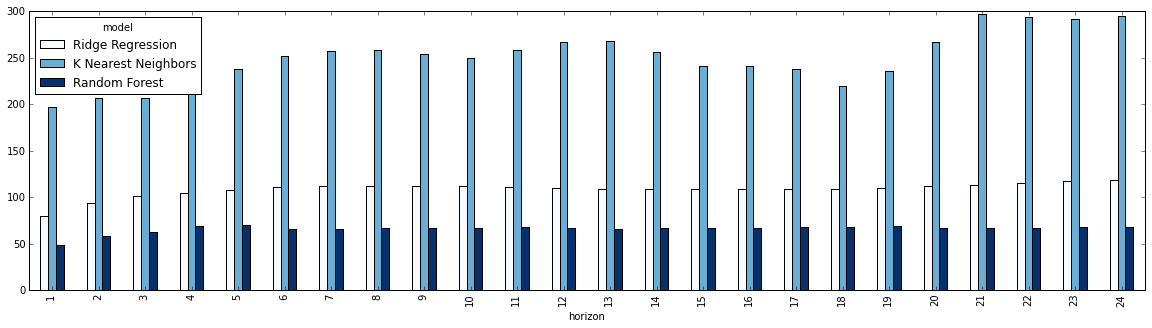

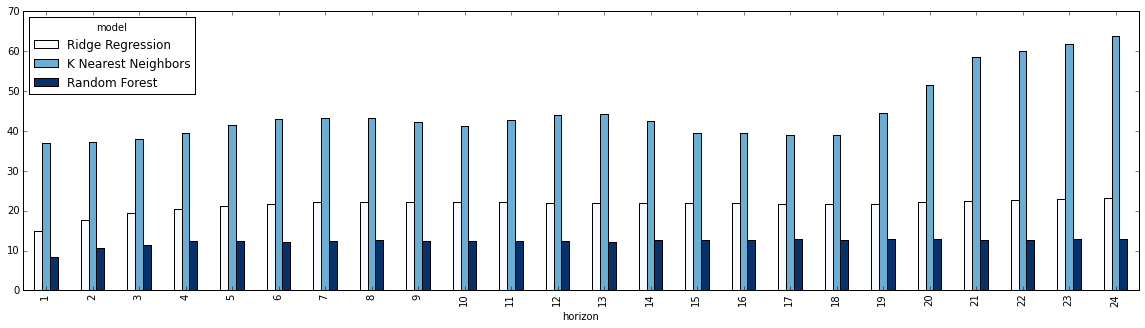

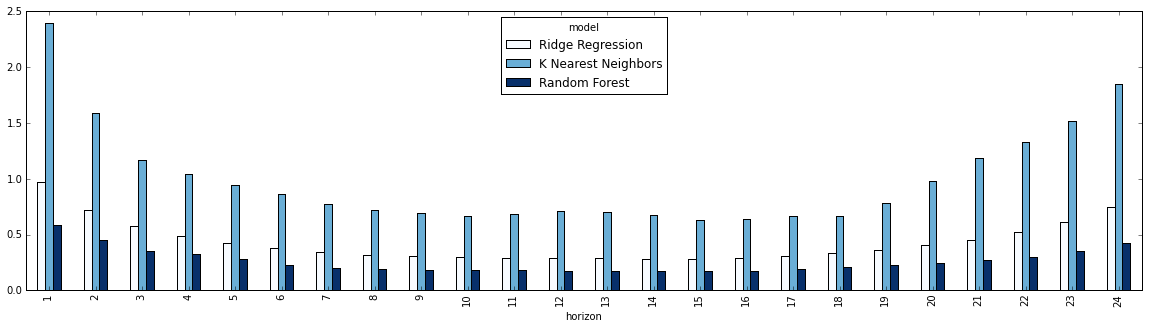

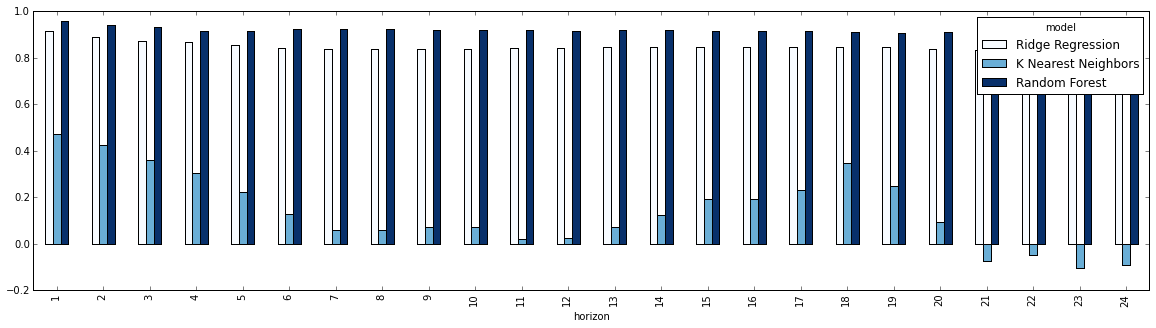

In [664]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs('AR_WF_DT',level="dataset")["id12041022"][err_measure].unstack().reindex_axis(
            validation_df.index.get_level_values(2).unique()[1:4], axis=1).plot(kind='bar', figsize=(20,5), colormap='Blues')

### Random forest error for different sensors and horizons

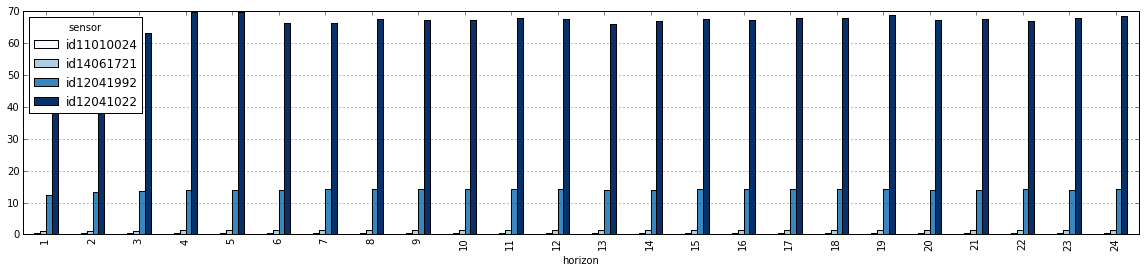

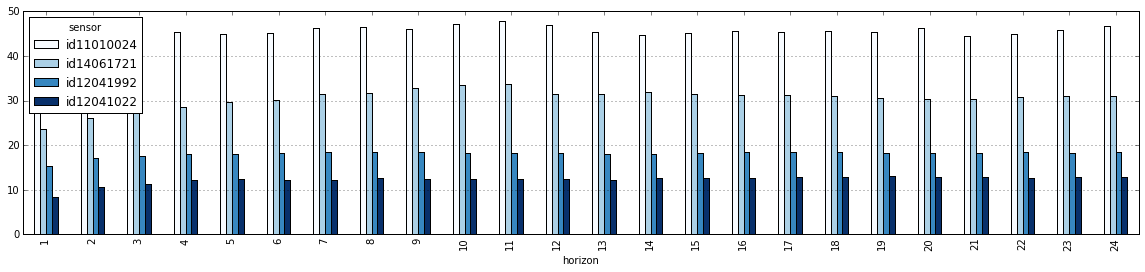

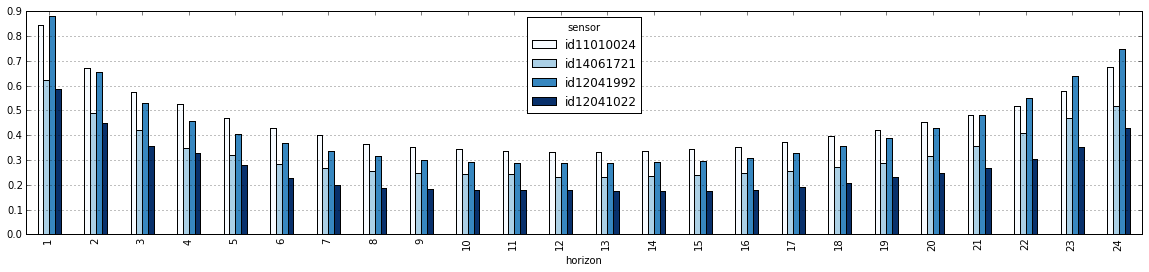

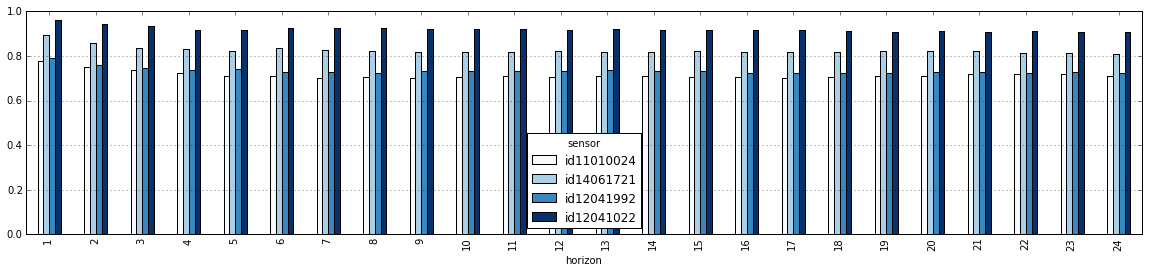

In [23]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    ax = validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(err_measure, level='error metric', axis=1).plot(
        kind='bar', figsize=(20,4), colormap='Blues')
           
    plt.gca().yaxis.grid(True)
    

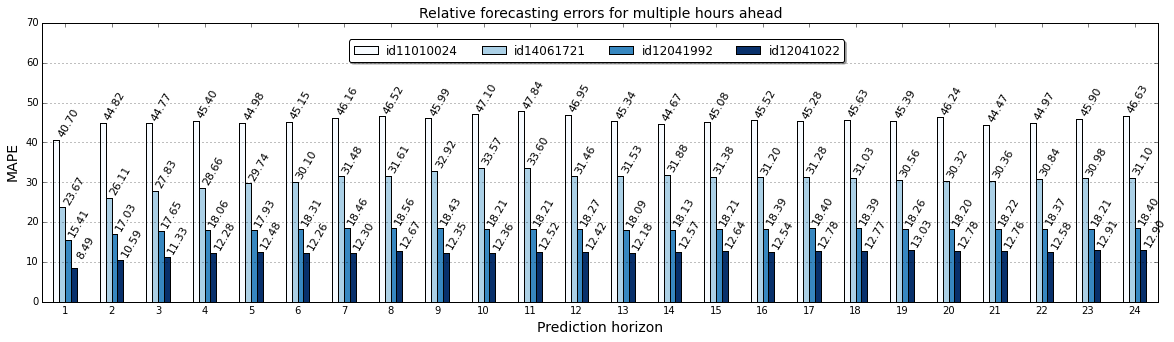

In [160]:
ax = validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs("MAPE", level='error metric', axis=1).plot(
    kind='bar', figsize=(20,5), colormap='Blues', ylim=(0,70))

for p in ax.patches:

    label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
    height = p.get_height() + 6 if p.get_y() >= 0 else 0.12*1.1

    ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() + 0.2, height), fontsize=11, ha='center', rotation=60)
    
plt.gca().yaxis.grid(True)
plt.xticks(rotation=0)
ax.set_title("Relative forecasting errors for multiple hours ahead", fontsize=14)
ax.set_ylabel("MAPE", fontsize=14)
ax.set_xlabel("Prediction horizon", fontsize=14)
plt.legend(loc="center left",  bbox_to_anchor=(0.27, 0.90), ncol=4, fancybox=True, shadow=True)

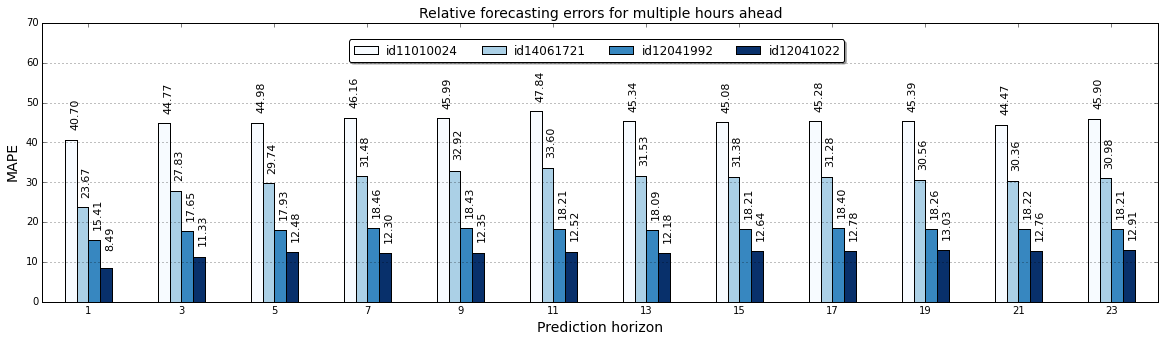

In [172]:
ax = validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(
    "MAPE", level='error metric', axis=1).loc[range(1, 24,2)].plot(
    kind='bar', figsize=(20,5), colormap='Blues', ylim=(0,70))

for p in ax.patches:

    label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
    height = p.get_height() + 8 if p.get_y() >= 0 else 0.12*1.1

    ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=11, ha='center', rotation=90)
    
plt.gca().yaxis.grid(True)
plt.xticks(rotation=0)
ax.set_title("Relative forecasting errors for multiple hours ahead", fontsize=14)
ax.set_ylabel("MAPE", fontsize=14)
ax.set_xlabel("Prediction horizon", fontsize=14)
plt.legend(loc="center left",  bbox_to_anchor=(0.27, 0.90), ncol=4, fancybox=True, shadow=True)

In [155]:
range(1,24,2)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

In [157]:

validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(err_measure, level='error metric', axis=1).loc[range(1, 24,2)]

sensor,id11010024,id14061721,id12041992,id12041022
horizon,,,,
1,0.84,0.62,0.88,0.59
3,0.57,0.42,0.53,0.36
5,0.47,0.32,0.41,0.28
7,0.40,0.27,0.34,0.20
9,0.35,0.25,0.30,0.18
11,0.34,0.24,0.29,0.18
13,0.33,0.23,0.29,0.17
15,0.34,0.24,0.30,0.18
17,0.37,0.26,0.33,0.19


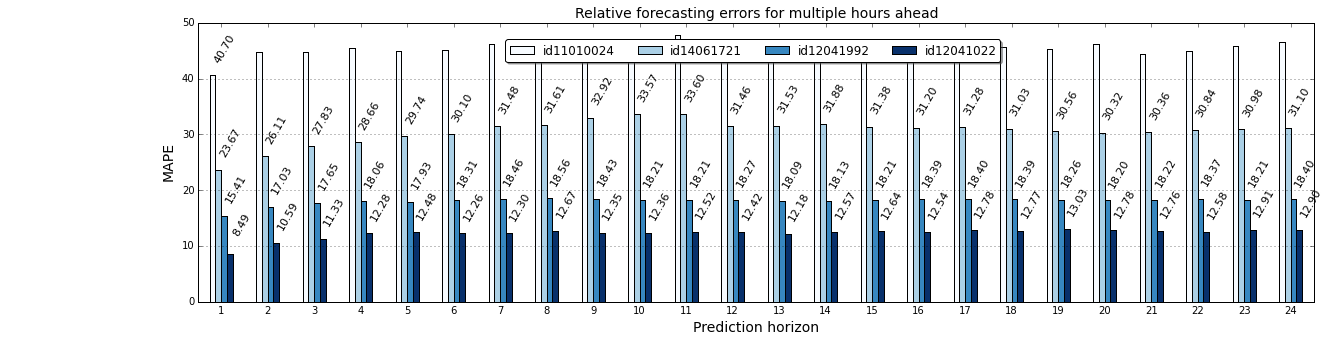

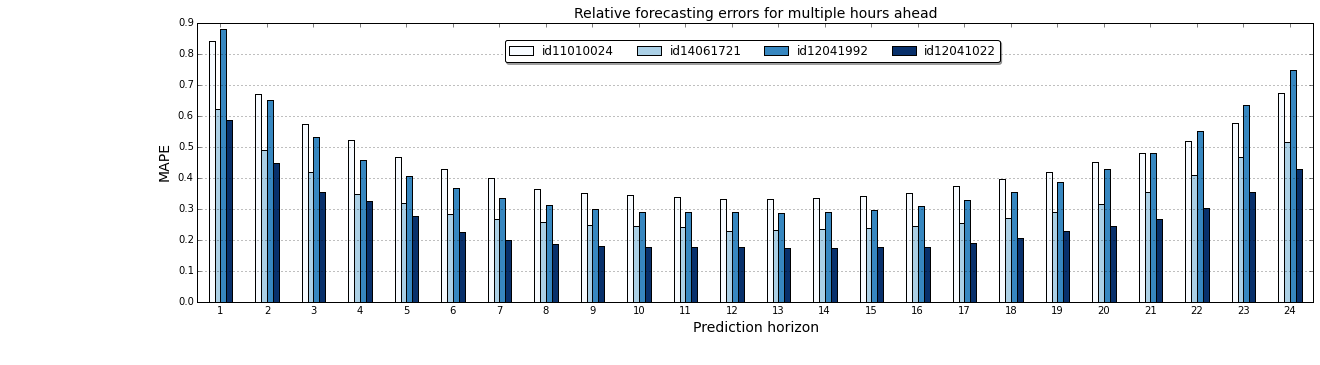

In [121]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    {'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]

for err_measure in ["MAPE","MASE"]:

    ax = validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(err_measure, level='error metric', axis=1).plot(
        kind='bar', figsize=(20,5), colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 6 if p.get_y() >= 0 else 0.12*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() + 0.2, height), fontsize=11, ha='center', rotation=60)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title("Relative forecasting errors for multiple hours ahead", fontsize=14)
    ax.set_ylabel("MAPE", fontsize=14)
    ax.set_xlabel("Prediction horizon", fontsize=14)
    plt.legend(loc="center left",  bbox_to_anchor=(0.27, 0.90), ncol=4, fancybox=True, shadow=True)

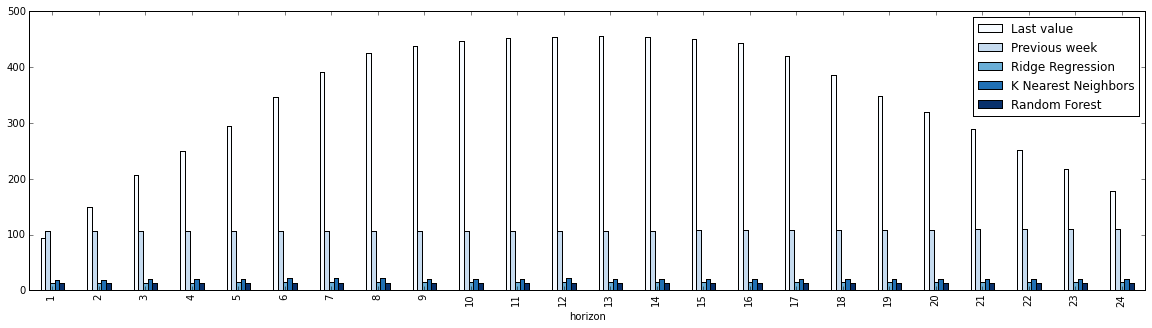

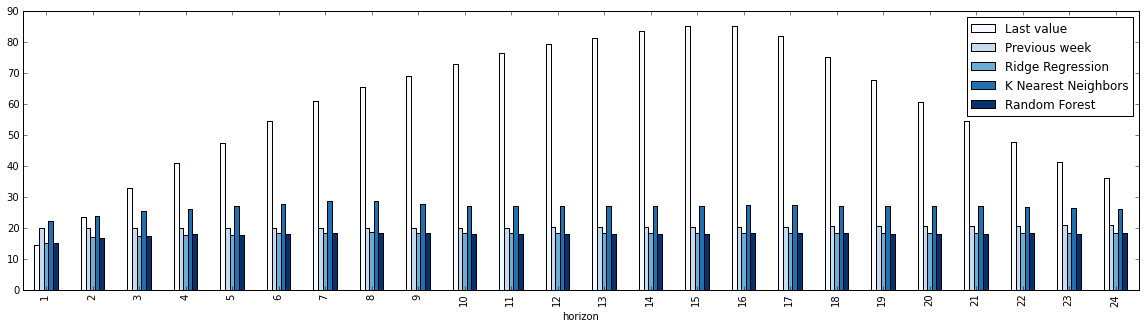

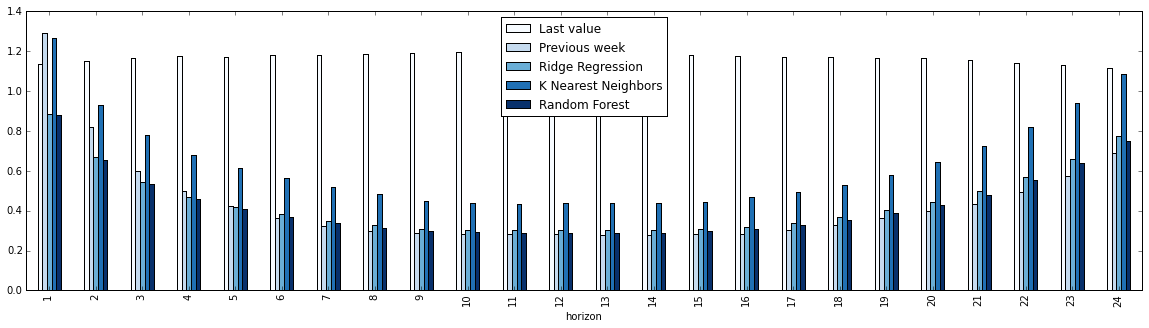

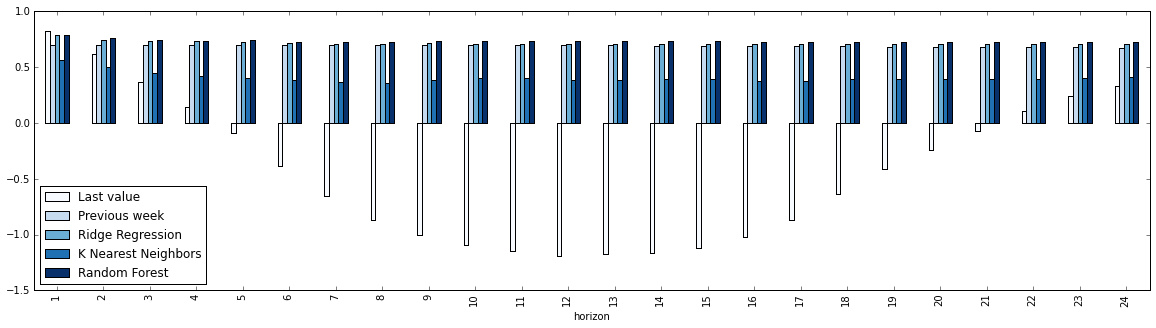

In [651]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022'][err_measure][['Last value', 'Previous week']].join(
        validation_df.xs('AR_WF_DT',level="dataset")["id12041992"][err_measure].unstack().reindex_axis(
                validation_df.index.get_level_values(2).unique()[1:4], axis=1)).plot(
                    kind='bar', figsize=(20,5), colormap='Blues')

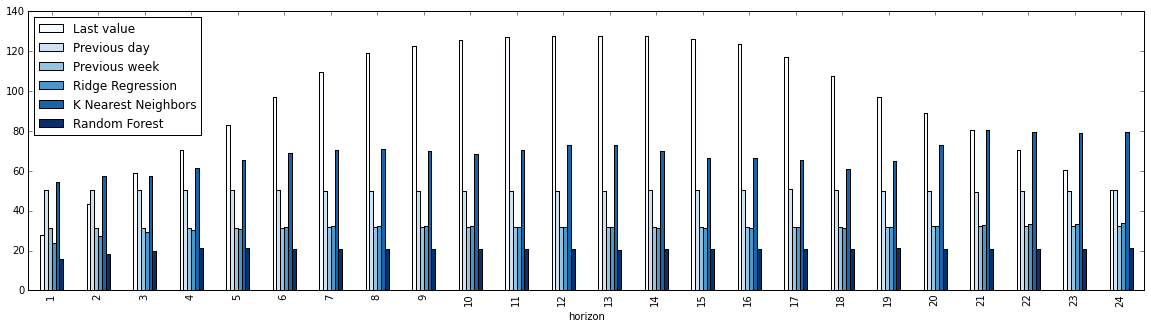

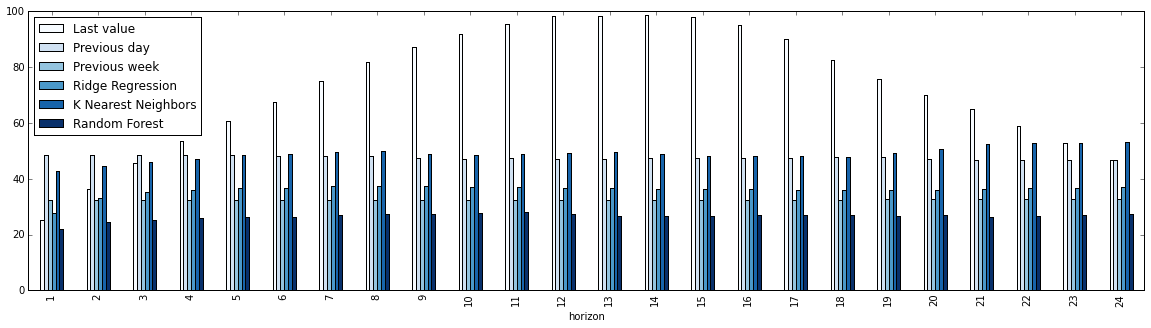

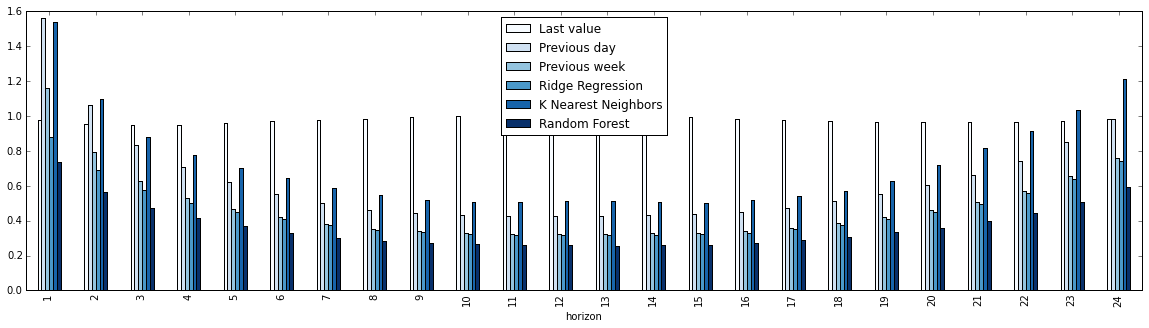

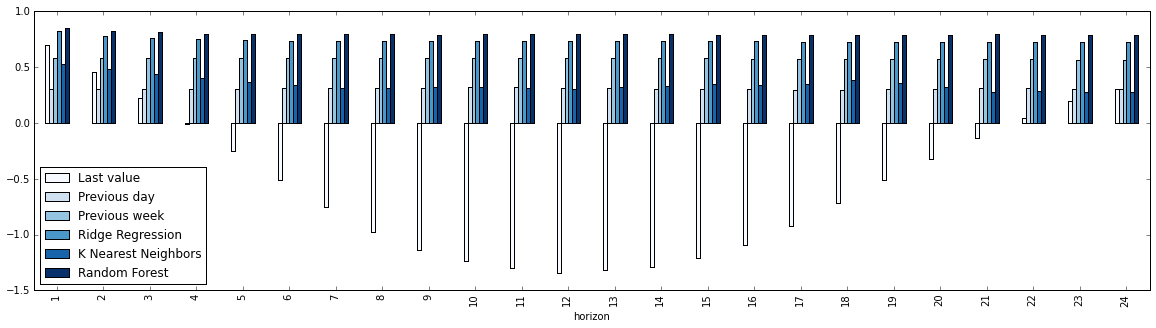

In [17]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs(["Baselines"], level=["model"]).groupby(level='error metric', axis=1).mean().unstack()[err_measure][['Last value', 'Previous day', 'Previous week']].join(
        validation_df.xs('AR_WF_DT',level="dataset").groupby(level='error metric', axis=1).mean().unstack()[err_measure].reindex_axis(
                validation_df.index.get_level_values(2).unique()[1:4], axis=1)).plot(
                    kind='bar', figsize=(20,5), colormap='Blues')

## Evaluation Scores Over All Horizons

In [13]:
validation_df.groupby(level=['dataset', 'model']).mean()

sensor                                  id14061721                       \
error metric                                    R2       MAE       MAPE   
dataset             model                                                 
Last value          Baselines             0.561509  1.675817  29.038490   
Previous day        Baselines             0.399188  2.035682  41.442958   
Previous week       Baselines             0.655598  1.569669  30.650789   
Measurement average Baselines             0.176525  3.042106  72.821162   
AR                  Ridge Regression      0.812825  1.276349  27.640770   
                    K Nearest Neighbors   0.785566  1.356553  29.801900   
                    Random Forest         0.823768  1.255085  29.553442   
SELECTED            Ridge Regression      0.755056  1.611357  39.967885   
                    K Nearest Neighbors   0.781093  1.401275  30.995457   
                    Random Forest         0.842835  1.194789  26.340880   

sensor                                             
error metric                                 MASE  
dataset             model                          
Last value          Baselines            0.728761  
Previous day        Baselines            0.939339  
Previous week       Baselines            0.724327  
Measurement average Baselines            1.378100  
AR                  Ridge Regression     0.575318  
                    K Nearest Neighbors  0.616033  
                    Random Forest        0.565061  
SELECTED            Ridge Regression     0.711889  
                    K Nearest Neighbors  0.631593  
                    Random Forest        0.538496

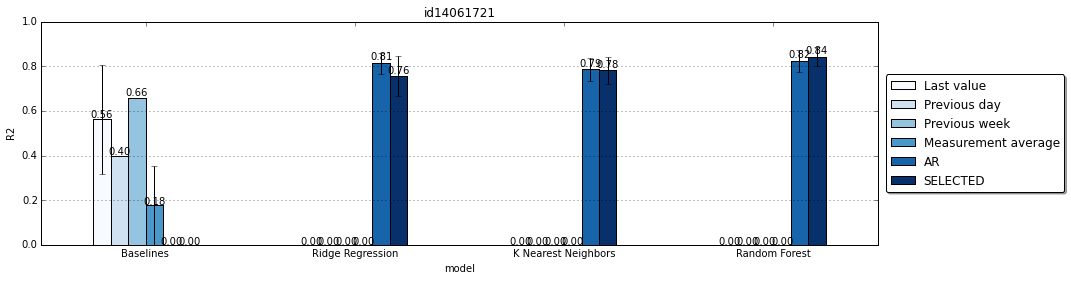

In [49]:
for sensor_id in validation_df.columns.levels[0]:
        
    err = validation_df.groupby(level=['dataset', 'model']).std()[sensor_id]['R2'].unstack(0)
            
    ax = validation_df.groupby(level=['dataset', 'model']).mean()[sensor_id]['R2'].unstack(0).plot(
        yerr=err, kind='bar', figsize=(15,4), rot=0, title=sensor_id, colormap='Blues', ylim=(0,1))
    
    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel('R2')
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

### Errors only for specific prediction horizon

In [388]:
"""
for sensor_id in validation_df.columns.levels[0]:
    ax = validation_df.loc[20][sensor_id]['R2'].unstack(0).plot(
        kind='bar', figsize=(15,4), rot=0, title=sensor_id, colormap='Blues', ylim=(0,1))
    
    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel(measure)
    plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)
"""

'\nfor sensor_id in validation_df.columns.levels[0]:\n    ax = validation_df.loc[20][sensor_id][\'R2\'].unstack(0).plot(\n        kind=\'bar\', figsize=(15,4), rot=0, title=sensor_id, colormap=\'Blues\', ylim=(0,1))\n    \n    for p in ax.patches:\n        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha=\'center\')\n    \n    plt.gca().yaxis.grid(True)\n    ax.set_ylabel(measure)\n    plt.legend(loc=\'right\', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)\n'

## Evaluation Scores for Each Horizon

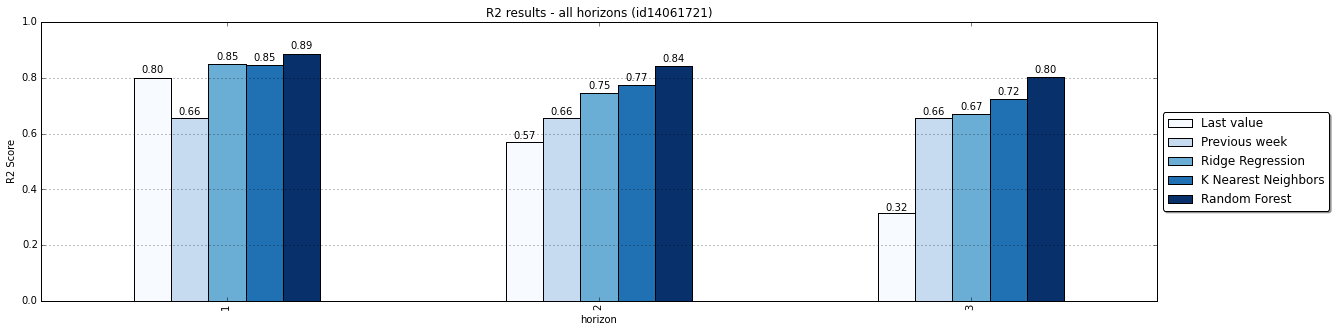

In [55]:
ax = validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022']['R2'][['Last value', 'Previous week']].join(
    validation_df.xs(["SELECTED"], level=["dataset"]).unstack()['id12041022']['R2']).plot(
    kind='bar', figsize=(20,5), title='R2 results - all horizons (id14061721)', ylim=(0,1), colormap='Blues')

for p in ax.patches:
    ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')

ax.yaxis.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True)
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.), ncol=5, fancybox=True, shadow=True)
#plt.legend(loc=4)
plt.ylabel('R2 Score')

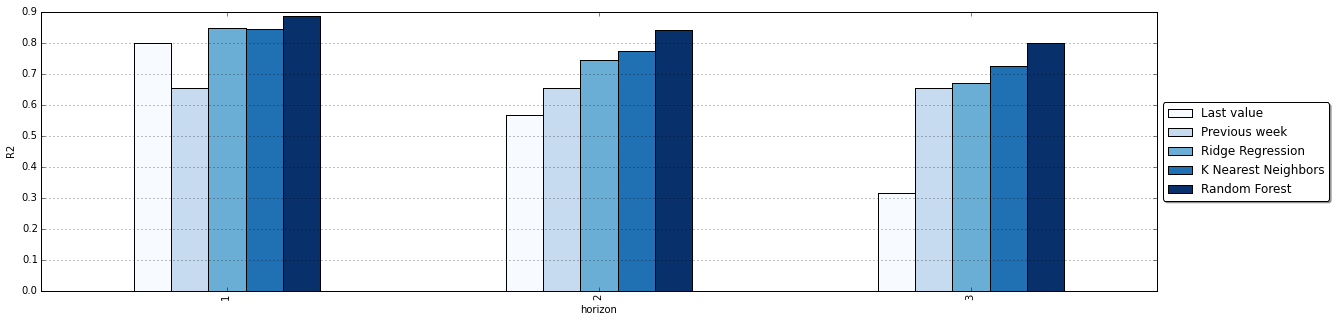

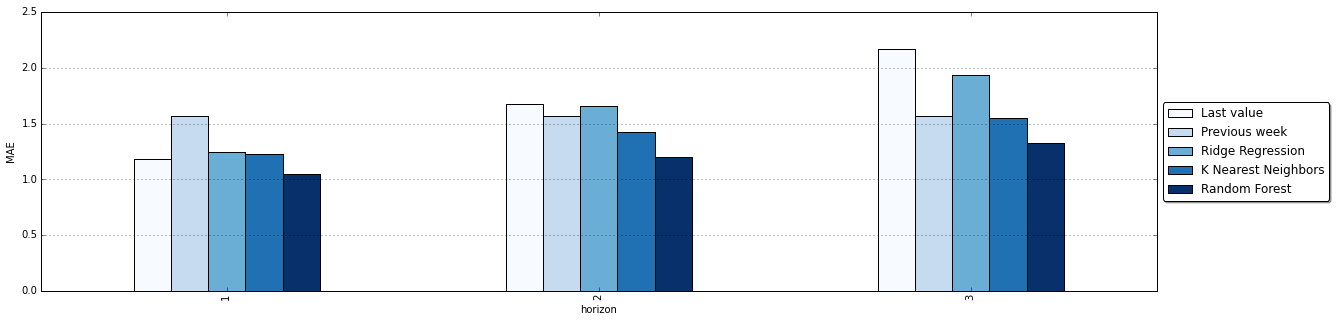

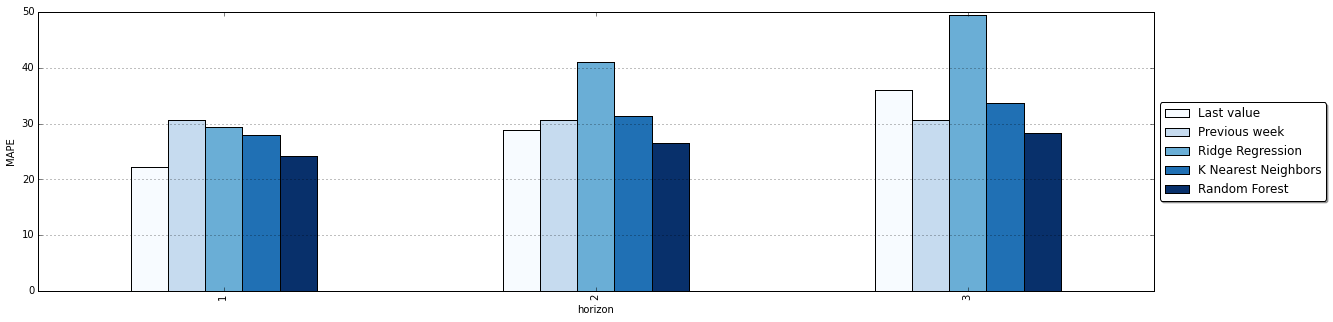

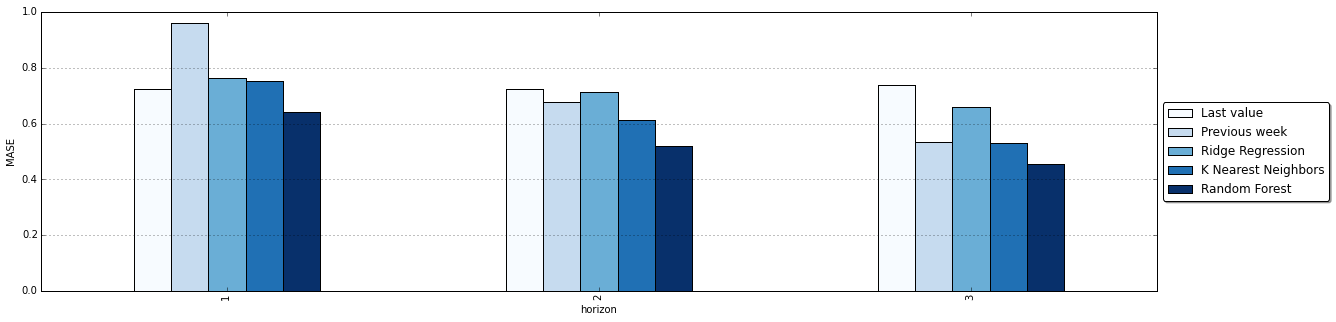

In [67]:
for measure in validation_df.columns.levels[1]:
    
    ax = validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022'][measure][['Last value', 'Previous week']].join(
        validation_df.xs(["SELECTED"], level=["dataset"]).unstack()['id12041022'][measure]).plot(
        kind='bar', figsize=(20,5), colormap='Blues')
    
    ax.yaxis.grid()   
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True)
    plt.ylabel(measure)
 

## Average Score by Sensors and Horizons

In [16]:
validation_df.groupby(level=['dataset', 'model']).mean().groupby(level='error metric', axis=1).mean()

error metric                                   R2       MAE       MAPE  \
dataset             model                                                
Last value          Baselines            0.561509  1.675817  29.038490   
Previous day        Baselines            0.399188  2.035682  41.442958   
Previous week       Baselines            0.655598  1.569669  30.650789   
Measurement average Baselines            0.176525  3.042106  72.821162   
AR                  Ridge Regression     0.812825  1.276349  27.640770   
                    K Nearest Neighbors  0.785566  1.356553  29.801900   
                    Random Forest        0.823768  1.255085  29.553442   
SELECTED            Ridge Regression     0.755056  1.611357  39.967885   
                    K Nearest Neighbors  0.781093  1.401275  30.995457   
                    Random Forest        0.842835  1.194789  26.340880   

error metric                                 MASE  
dataset             model                          
Last value          Baselines            0.728761  
Previous day        Baselines            0.939339  
Previous week       Baselines            0.724327  
Measurement average Baselines            1.378100  
AR                  Ridge Regression     0.575318  
                    K Nearest Neighbors  0.616033  
                    Random Forest        0.565061  
SELECTED            Ridge Regression     0.711889  
                    K Nearest Neighbors  0.631593  
                    Random Forest        0.538496

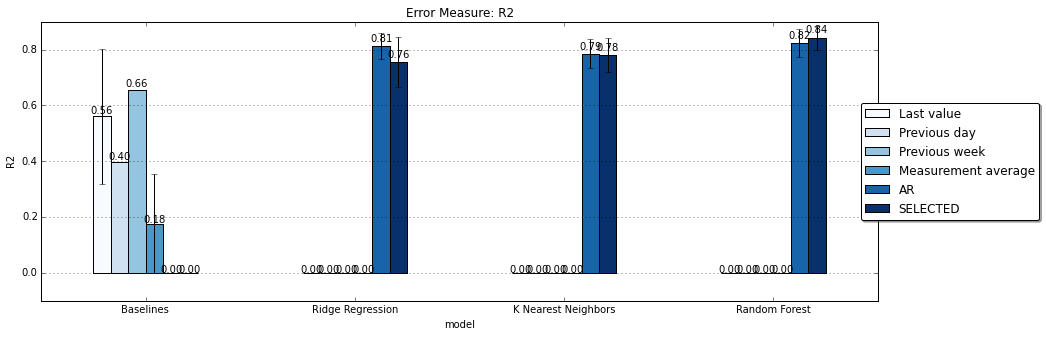

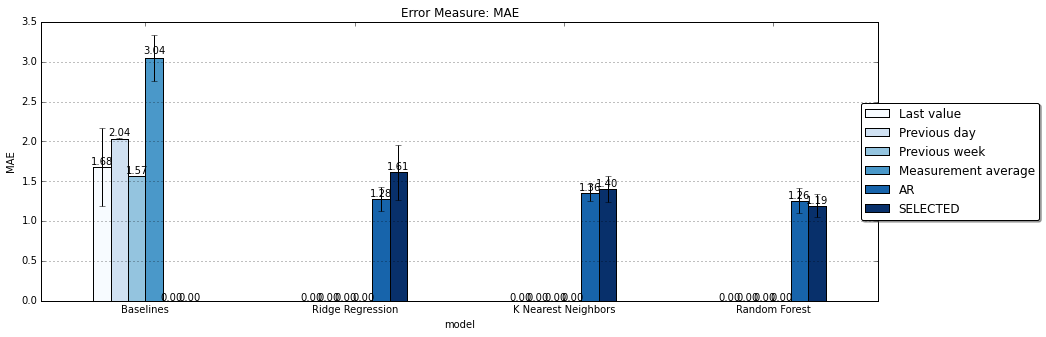

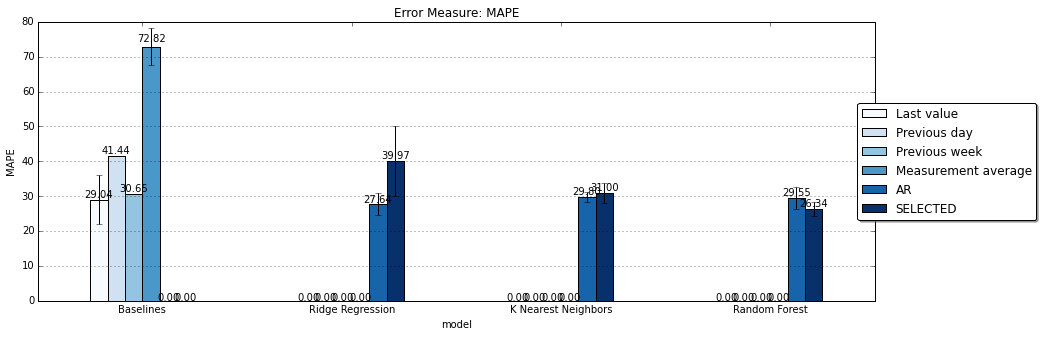

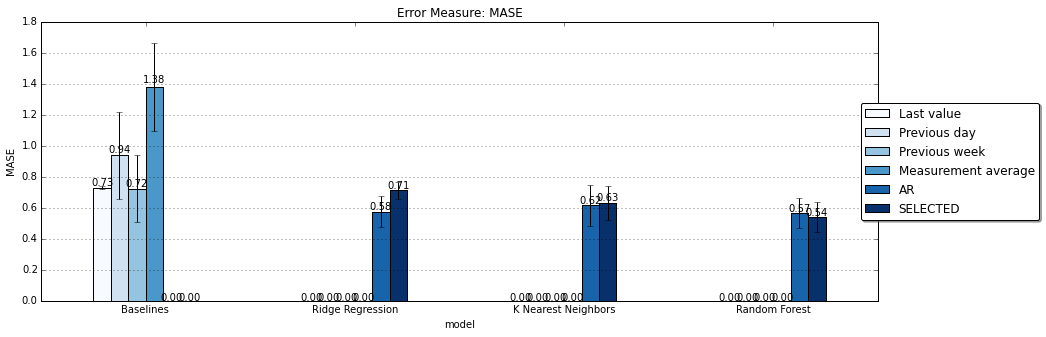

In [18]:
for measure in validation_df.columns.levels[1]:

    err = ax = validation_df.groupby(level=['dataset', 'model']).std().groupby(
        level='error metric', axis=1).mean()[measure].unstack(0)
    
    ax = validation_df.groupby(level=['dataset', 'model']).mean().groupby(
        level='error metric', axis=1).mean()[measure].unstack(0).plot(
        yerr=err, kind='bar', figsize=(15,5), rot=0, title="Error Measure: {}".format(measure), colormap='Blues')

    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel(measure)
    plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.